In [59]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kernels import TauKernel
from omega_meshes import LinearOmegaMesh

from scipy.integrate import simps
from scipy.special import eval_legendre

from scipy.linalg import svd

from spectral_function_to_Gl_simps_mat import Aw2Gl, Aw2Gl_loadmat

In [60]:
A_predict = np.load("../test_data/A_predict_MCDropout-3_d01_n001.npy")

In [61]:
A_omega_val = np.load("../analyticContinuation/ANNNotebooks/A_omega_val.npy")
Gl_val = np.load("../analyticContinuation/ANNNotebooks/Gl_val.npy")
A_omega_val = A_omega_val[:,:]

In [62]:
Gl_val_noise = np.load("../analyticContinuation/ANNNotebooks/Gl_noise_001_val.npy")

In [63]:
omega = np.load("../A_Gl_1000_40_80_1_Arsenault/omega.npy")

In [64]:
def Aw2Gl_mat(A_arr, omega, beta, np_tau, lmax):
    tau = np.linspace(0, beta, np_tau)
    x = np.linspace(-1, 1, np_tau)

    K = TauKernel(tau=tau, omega=LinearOmegaMesh(omega_min = omega[0], 
                                                 omega_max = omega[-1], 
                                                 n_points=omega.shape[0]),
                  beta=beta)

    legendre_mat = np.zeros((lmax, np_tau), dtype = np.longdouble)

    simps_coeff = np.zeros(np_tau)
    simps_coeff[np.arange(np_tau)%2 == 0] = 2
    simps_coeff[np.arange(np_tau)%2 == 1] = 4
    simps_coeff[0] = 1
    simps_coeff[-1] = 1
    
    for i in range(lmax):
        legendre_mat[i,:] = np.sqrt(2*i + 1, dtype = np.longdouble) * eval_legendre(i,x).astype(np.longdouble) * simps_coeff.astype(np.longdouble)
        
    legendre_mat = legendre_mat * beta/(3*np_tau)

    o2l = legendre_mat.dot((K.K_delta).astype(np.longdouble))
    
    Gl = np.einsum('ij,nj->ni', o2l, A_arr)
        
    return Gl

In [65]:
def o2l(omega, beta, np_tau, lmax):
    tau = np.linspace(0, beta, np_tau)
    x = np.linspace(-1, 1, np_tau)

    K = TauKernel(tau=tau, omega=LinearOmegaMesh(omega_min = omega[0], 
                                                 omega_max = omega[-1], 
                                                 n_points=omega.shape[0]),
                  beta=beta)

    legendre_mat = np.zeros((lmax, np_tau), dtype = np.longdouble)

    simps_coeff = np.zeros(np_tau)
    simps_coeff[np.arange(np_tau)%2 == 0] = 2
    simps_coeff[np.arange(np_tau)%2 == 1] = 4
    simps_coeff[0] = 1
    simps_coeff[-1] = 1
    
    for i in range(lmax):
        legendre_mat[i,:] = np.sqrt(2*i + 1, dtype = np.longdouble) * eval_legendre(i,x).astype(np.longdouble) * simps_coeff.astype(np.longdouble)
        
    legendre_mat = legendre_mat * beta/(3*np_tau)

    o2l = legendre_mat.dot((K.K_delta).astype(np.longdouble))
    
   
        
    return o2l

In [66]:
%matplotlib notebook

In [67]:
o2l_mat_b40 = np.load("o2l_b40.npy")

In [68]:
u_b40, s_b40, vh_b40 = svd(o2l_mat_b40, lapack_driver='gesvd')
#u_b16, s_b16, vh_b16 = svd(o2l_mat_b16, lapack_driver='gesvd')
#u_b100, s_b100, vh_b100 = svd(o2l_mat_b100, lapack_driver='gesvd')
#u_b120, s_b120, vh_b120 = svd(o2l_mat_b120, lapack_driver='gesvd')
#u_b160, s_b160, vh_b160 = svd(o2l_mat_b160, lapack_driver='gesvd')

In [69]:
8892/9

988.0

<IPython.core.display.Javascript object>


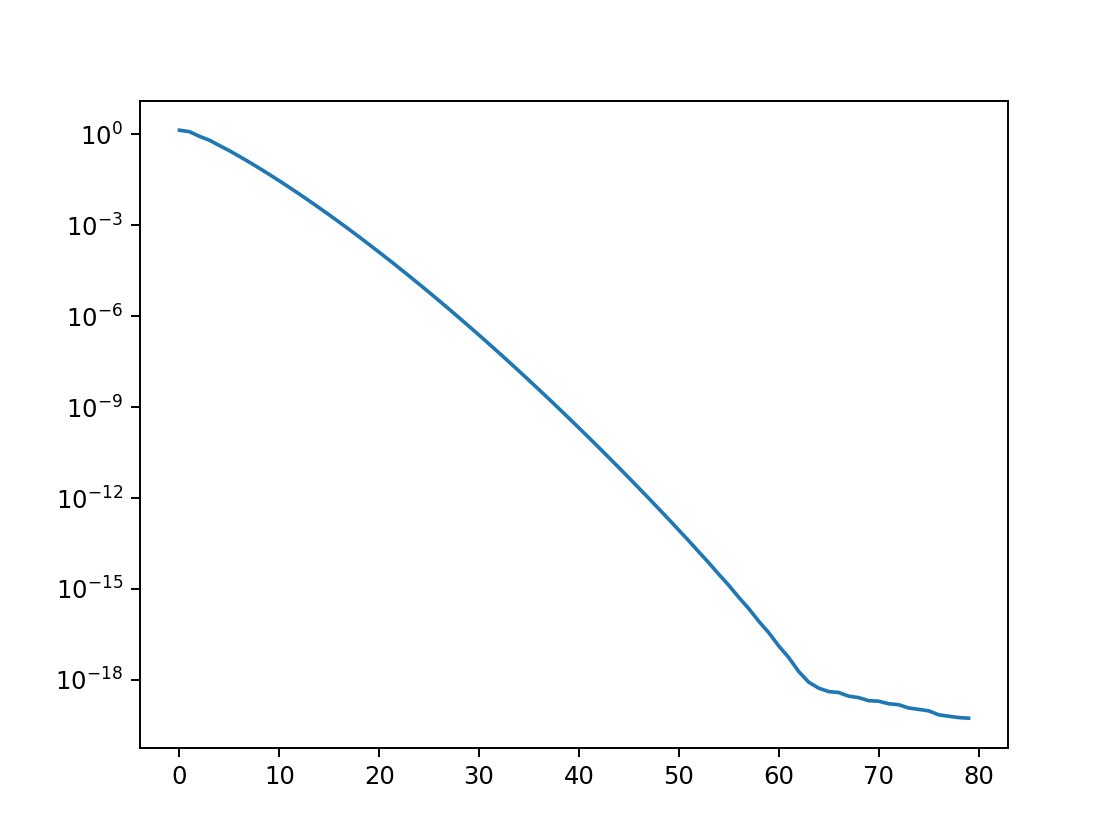

In [70]:
plt.plot(s_b40)
plt.yscale('log')

In [131]:
s_b40[0]

1.351259374142389

In [124]:
sigma = 1
r = 0
A = 1/sigma/np.sqrt(2*np.pi) *  np.exp(-0.5 * ((np.cosh(1.5*omega- r) -4)*0.1/sigma)**2)

In [125]:
plt.plot(omega, A/simps(A, omega))

<IPython.core.display.Javascript object>

In [126]:
simps(A_plot[2,:], omega)

1.0

<IPython.core.display.Javascript object>


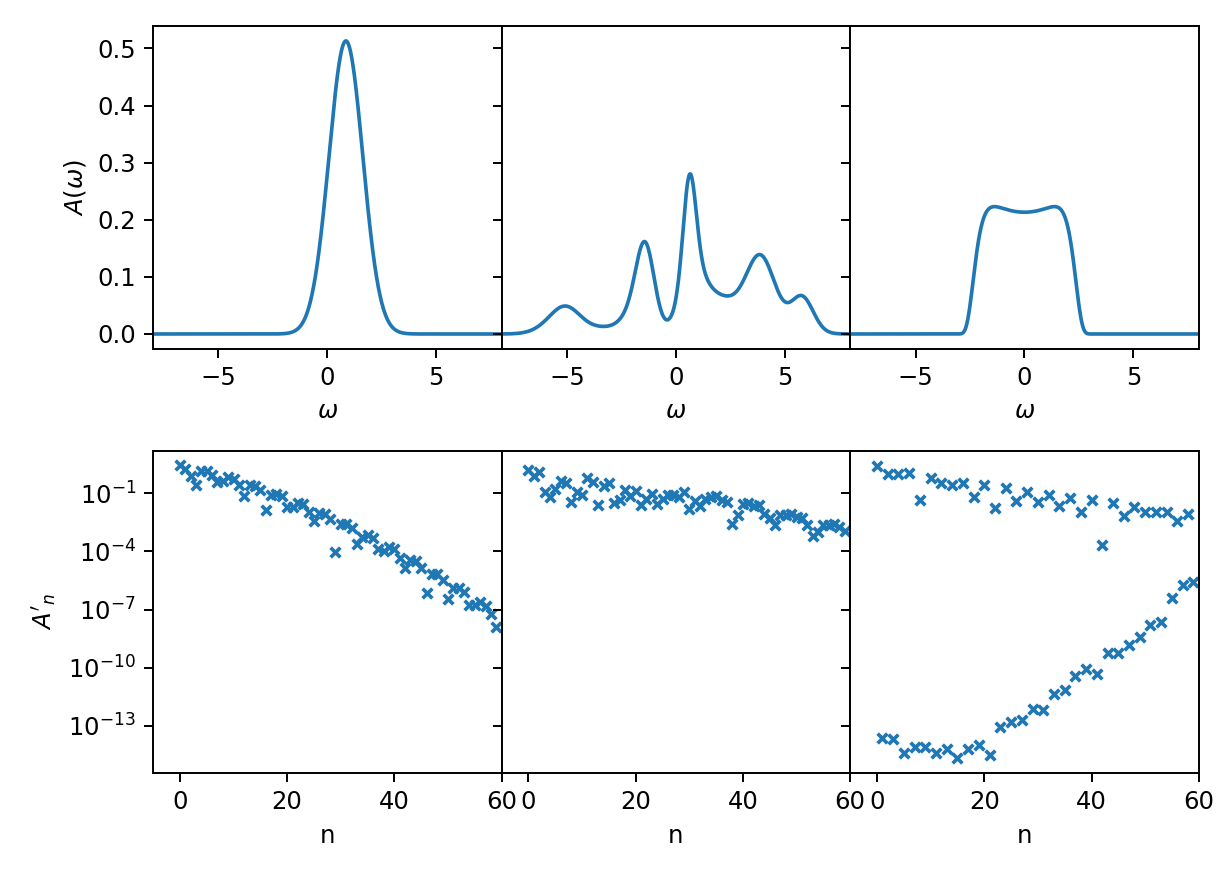

In [130]:
A_plot = np.zeros((3, 800))

A_plot[2,:] = A/simps(A, omega)
A_plot[0,:] = A_omega_val[988*4+100,:]
A_plot[1,:] = A_omega_val[123,:]

A_plot_trans = np.zeros((3, 80))

for i in range(3):
    A_plot_trans[i,:] = vh_b40[:80,:].dot(A_plot[i,:])

fig, axs = plt.subplots(2, 3, figsize = (7,5), sharey = 'row')

for i in range(3):
    axs[0, i].plot(omega, A_plot[i,:])
    axs[0, i].set_xlabel(r"$\omega$")
    if i == 0:
        axs[0, i].set_ylabel(r"$A(\omega)$")
    axs[0, i].set_xlim([-8,8])
        
    axs[1, i].scatter(np.arange(60), np.abs(A_plot_trans[i,:60]), s = 16, marker = 'x')
    axs[1, i].set_yscale('log')
    axs[1, i].set_xlabel("n")
    if i == 0:
        axs[1, i].set_ylabel(r"$A'_{n}$")
    axs[1, i].set_xlim([-5, 60])

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.savefig("Adecay.pdf", dpi = 300)

In [134]:
A_test = A
Gl_test = o2l_mat_b40.dot(A_test)

In [135]:
Gl_test[0]

-3.5709983751921377806

<IPython.core.display.Javascript object>


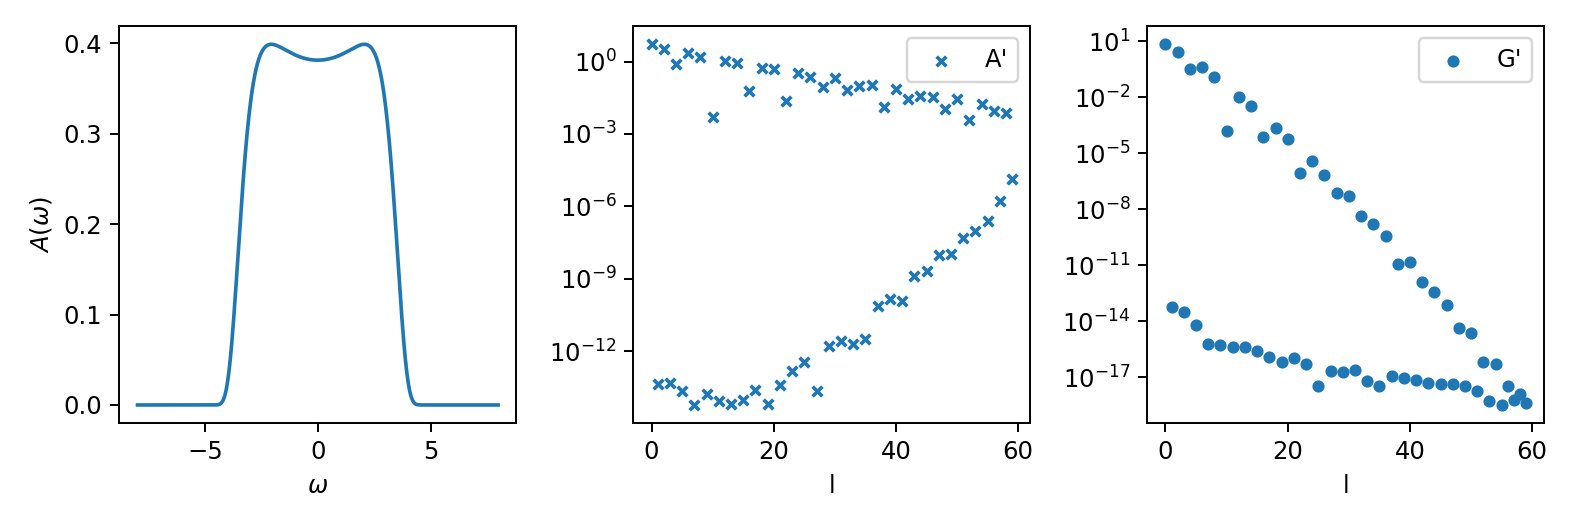

In [84]:
A_trans = vh_b40[:80,:].dot(A_test)
G_trans = u_b40.T.dot(Gl_test)
fig, axs = plt.subplots(1,3, figsize = (9,3))
axs[0].plot(omega, A_test)
axs[0].set_xlabel(r"$\omega$")
axs[0].set_ylabel(r"$A(\omega)$")
axs[1].scatter(np.arange(60), np.abs(A_trans[:60]), s = 16, marker = 'x', label= r"A'")
axs[1].set_yscale('log')
axs[2].scatter(np.arange(60), np.abs(G_trans[:60]), s = 16, marker = 'o', label = r"G'")
axs[2].set_yscale('log')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('l')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('l')
plt.tight_layout()

In [133]:
A_plot_trans[:,0]

array([2.81051213, 1.55131498, 2.4436433 ])

In [71]:
A_trans = vh_b40[:80,:].dot(A_omega_val[988*4+100,:])
G_trans = u_b40.T.dot(Gl_val[988*4+100,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])

G_trans_noisy = u_b40.T.dot(Gl_val_noise[988*4+100,:])

In [136]:
A_test = np.zeros(800)
A_test[200:600] = 1/8
Gl_test = o2l_mat_b40.dot(A_test)


In [137]:
Gl_test[0]

-1.3005065214168156264

<IPython.core.display.Javascript object>


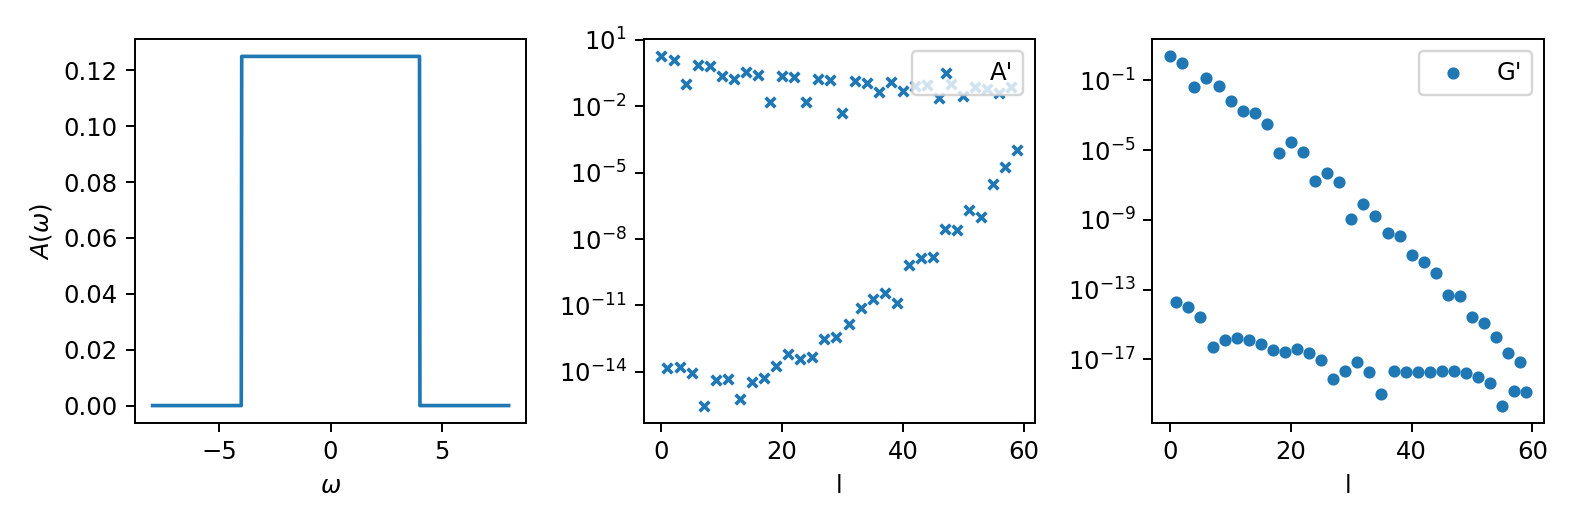

In [73]:

A_trans = vh_b40[:80,:].dot(A_test)
G_trans = u_b40.T.dot(Gl_test)
fig, axs = plt.subplots(1,3, figsize = (9,3))
axs[0].plot(omega, A_test)
axs[0].set_xlabel(r"$\omega$")
axs[0].set_ylabel(r"$A(\omega)$")
axs[1].scatter(np.arange(60), np.abs(A_trans[:60]), s = 16, marker = 'x', label= r"A'")
axs[1].set_yscale('log')
axs[2].scatter(np.arange(60), np.abs(G_trans[:60]), s = 16, marker = 'o', label = r"G'")
axs[2].set_yscale('log')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('l')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('l')
plt.tight_layout()

In [74]:
ind = 988*4+100
A_trans = vh_b40[:80,:].dot(A_omega_val[ind,:])
G_trans = u_b40.T.dot(Gl_val[ind,:])
fig, axs = plt.subplots(1,3, figsize = (9,3))
axs[0].plot(omega, A_omega_val[ind,:])
axs[0].set_xlabel(r"$\omega$")
axs[0].set_ylabel(r"$A(\omega)$")
axs[1].scatter(np.arange(60), np.abs(A_trans[:60]), s = 16, marker = 'x', label= r"A'")
axs[1].set_yscale('log')
axs[2].scatter(np.arange(60), np.abs(G_trans[:60]), s = 16, marker = 'o', label = r"G'")
axs[2].set_yscale('log')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('l')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('l')
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


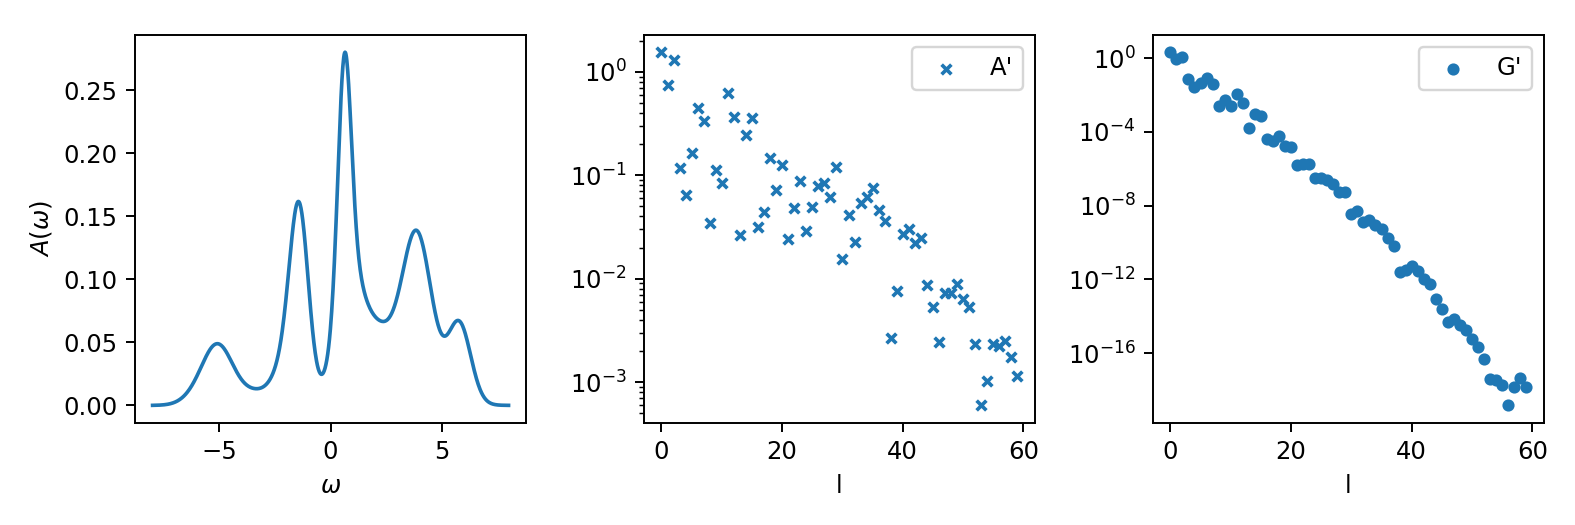

In [75]:
ind = 123
A_trans = vh_b40[:80,:].dot(A_omega_val[ind,:])
G_trans = u_b40.T.dot(Gl_val[ind,:])
fig, axs = plt.subplots(1,3, figsize = (9,3))
axs[0].plot(omega, A_omega_val[ind,:])
axs[0].set_xlabel(r"$\omega$")
axs[0].set_ylabel(r"$A(\omega)$")
axs[1].scatter(np.arange(60), np.abs(A_trans[:60]), s = 16, marker = 'x', label= r"A'")
axs[1].set_yscale('log')
axs[2].scatter(np.arange(60), np.abs(G_trans[:60]), s = 16, marker = 'o', label = r"G'")
axs[2].set_yscale('log')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('l')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('l')
plt.tight_layout()

<IPython.core.display.Javascript object>


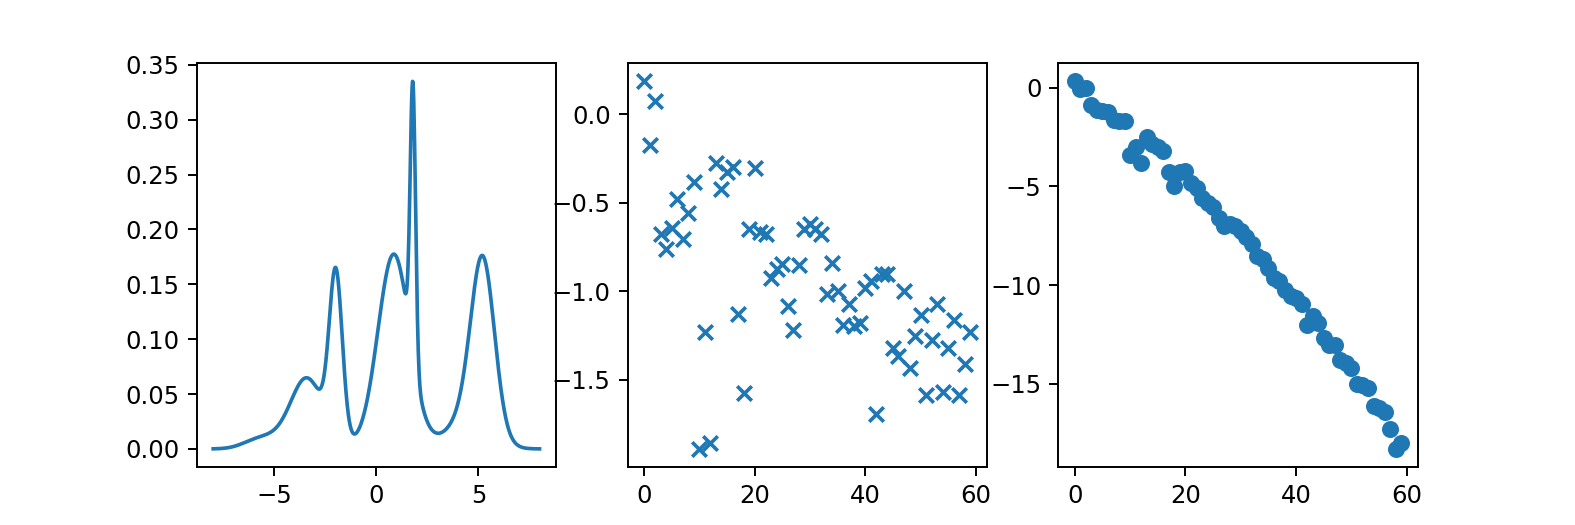

In [76]:
ind = 100
A_trans = vh_b40[:80,:].dot(A_omega_val[ind,:])
G_trans = u_b40.T.dot(Gl_val[ind,:])
fig, axs = plt.subplots(1,3, figsize = (9,3))

axs[0].plot(omega, A_omega_val[ind,:])
axs[1].scatter(np.arange(60), np.log10(np.abs(A_trans[:60])), marker = 'x', label= r"A'")
axs[2].scatter(np.arange(60), np.log10(np.abs(G_trans[:60])), marker = 'o', label = r"G'")

<IPython.core.display.Javascript object>


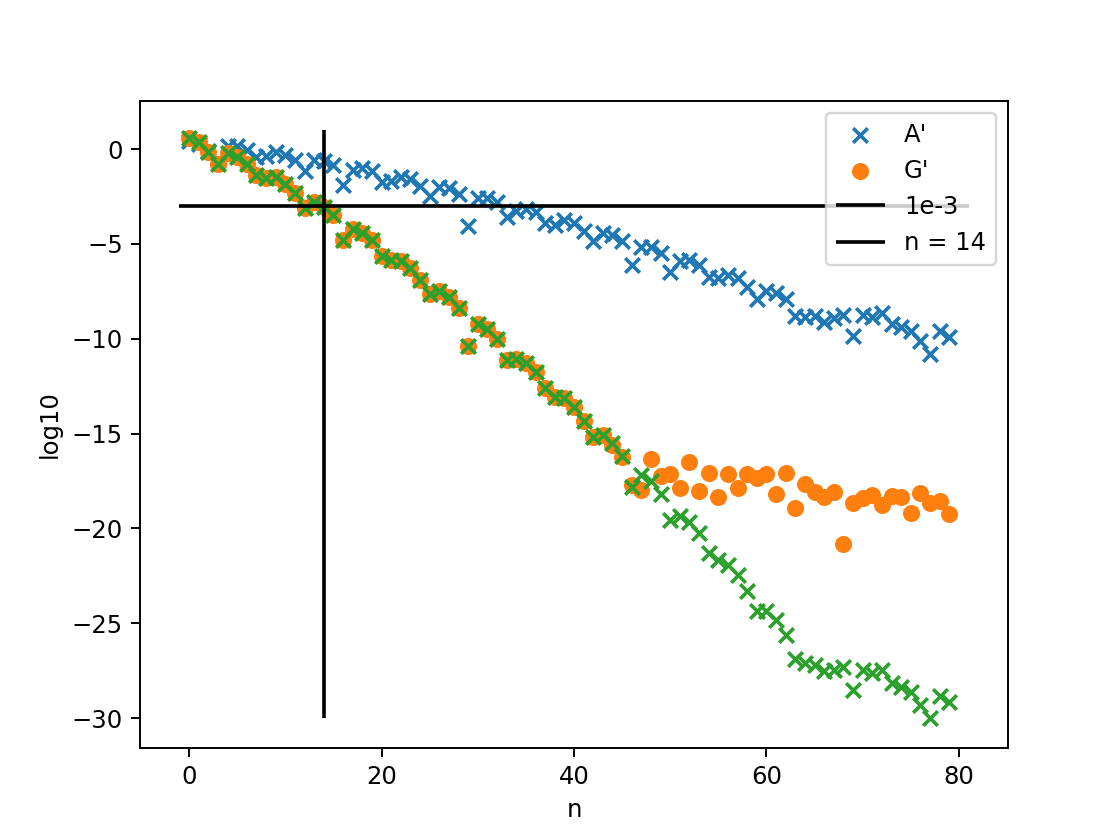

Text(0.5, 0, 'n')

In [14]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'o', label = r"G'")
#plt.scatter(np.arange(80), np.log10(s_b40), marker = 'o')
plt.scatter(np.arange(80), np.log10(np.abs( np.diag(s_b40).dot(A_trans)  )   ), marker = 'x')
#plt.scatter(np.arange(80), np.log10(np.abs(G_trans_test)), marker = 'x')

plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 14, ymin = -30, ymax = 1, color = 'k', label = r'n = 14')
#plt.hlines(y = np.log10(1e-5), xmin = -1, xmax = 81, color = 'g', label = r'1e-5')
#plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')

SVD relates noise level of Green's function to features in spectral functions. However, it is not obvious how many SVD basis is required to resolve a Gaussian peak of given mean and variance. If we plot MAE of SVD cutoff and ground truth spectral function against cutoff index for each data point, we will see a decreasing curve. We can construct a dataset by selecting spectral functions according to MAE at some cutoff index, in ascending order. The trained network on this dataset would probably only output spectral functions that takes less SVD basis to reconstruct.
If we construct the dataset in descending order, will it be able to learn the pattern and outperform SVD at the practical noise level?

<IPython.core.display.Javascript object>


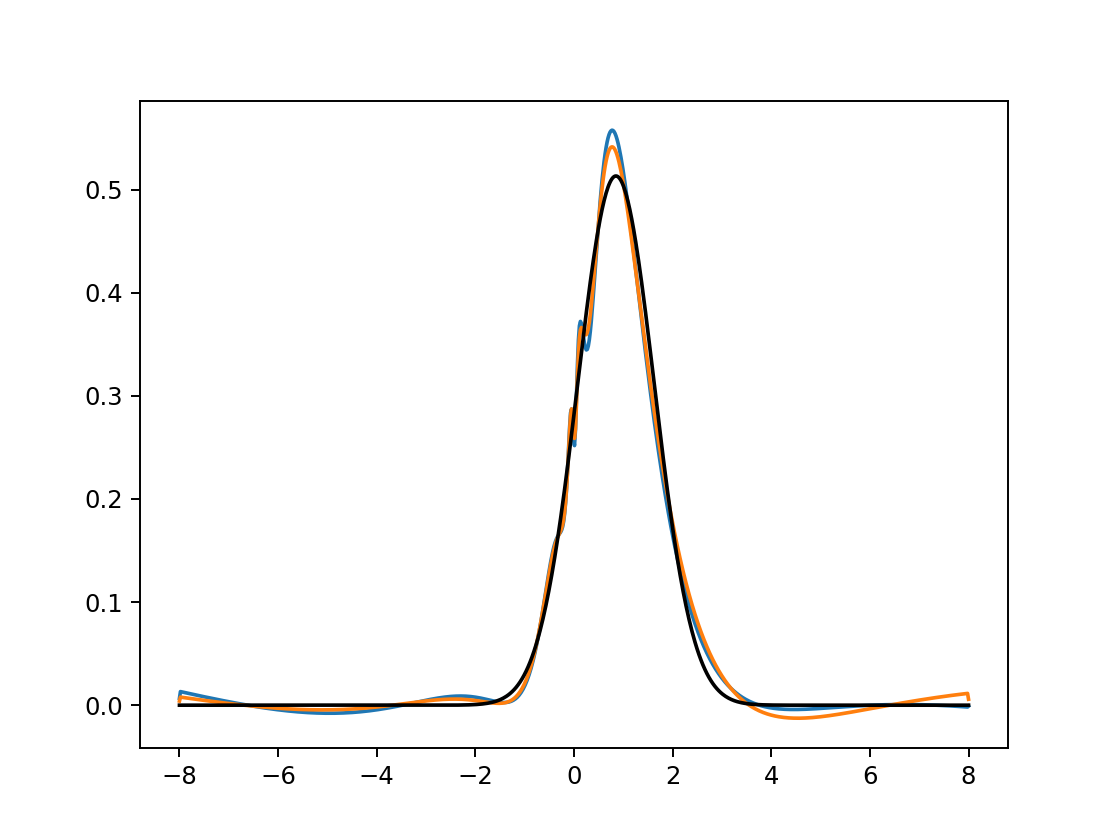

In [71]:
plt.plot(omega, vh_b40.T[:,:14].dot((np.diag(1/s_b40)[:14,:14].dot(G_trans_noisy[:14]))))
plt.plot(omega, vh_b40.T[:,:14].dot(A_trans[:14]))
plt.plot(omega, A_omega_val[988*4+100,:], color = 'k')

<IPython.core.display.Javascript object>


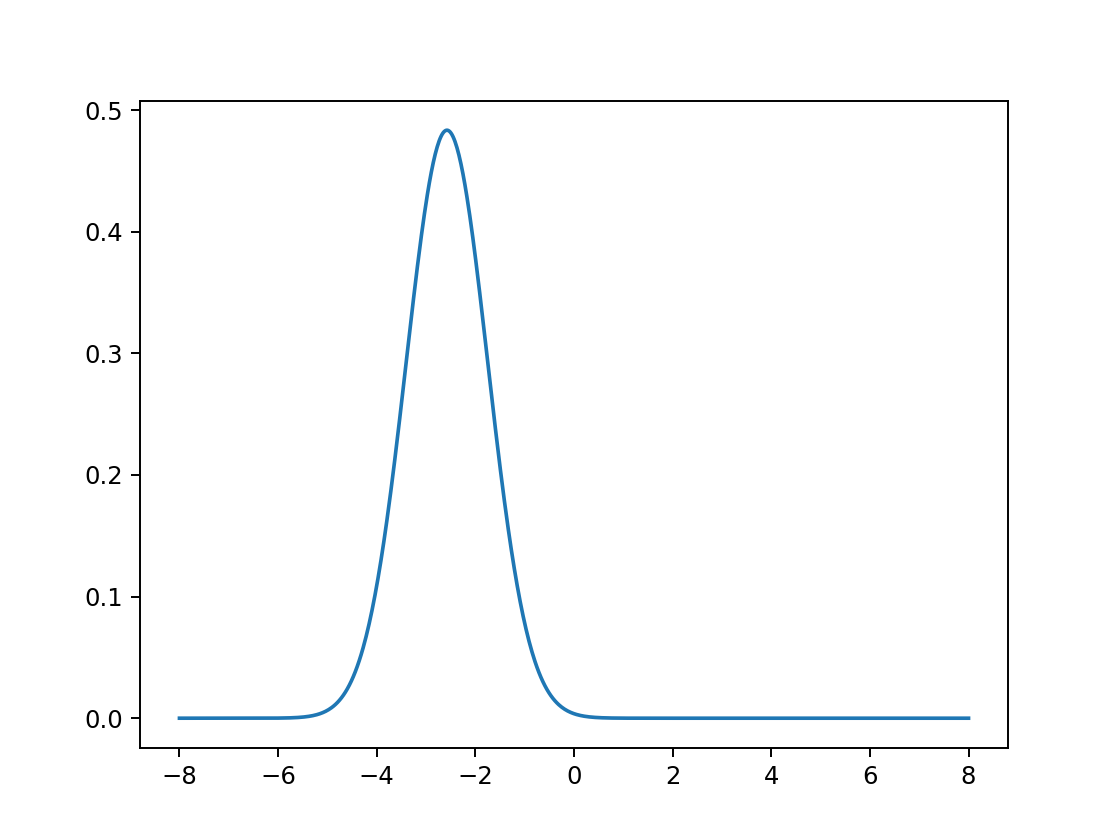

In [56]:
plt.plot(omega, A_omega_val[988*4 + 12,:])

In [57]:
A_trans = vh_b40[:80,:].dot(A_omega_val[988*4+12,:])
G_trans = u_b40.T.dot(Gl_val[988*4+12,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])

G_trans_noisy = u_b40.T.dot(Gl_val_noise[988*4+12,:])

<IPython.core.display.Javascript object>


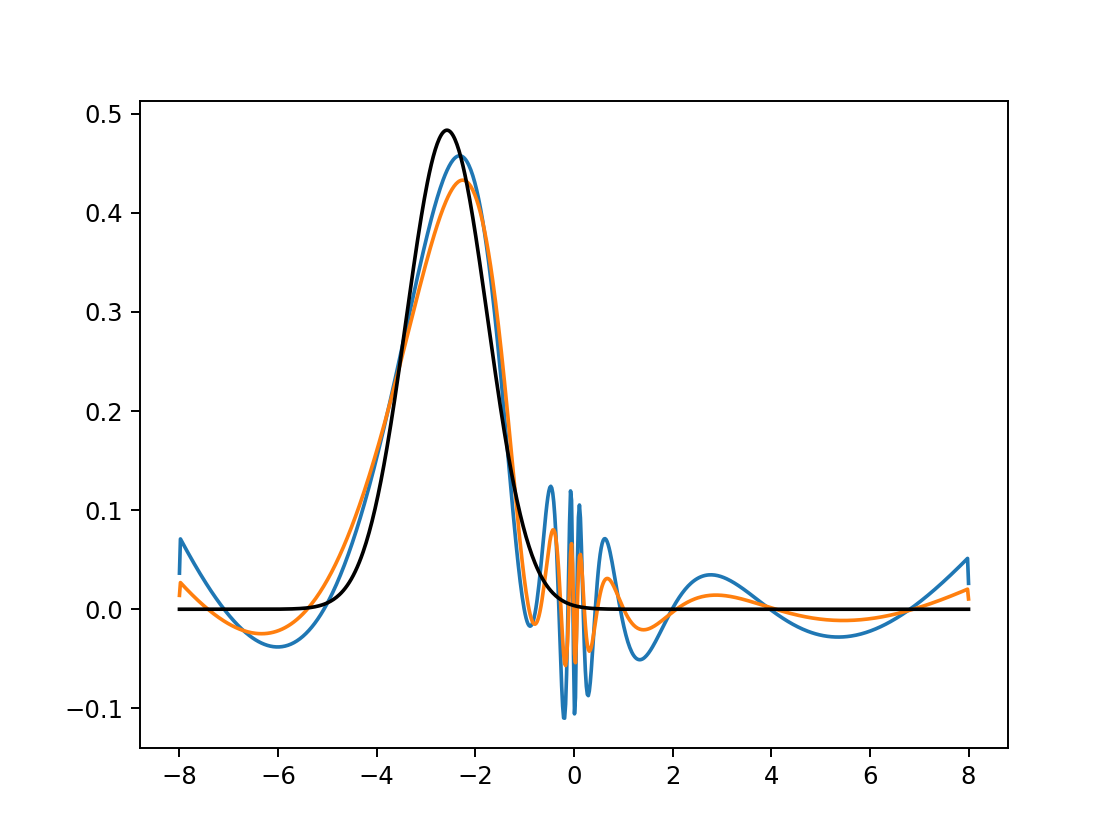

In [62]:
plt.plot(omega, vh_b40.T[:,:15].dot((np.diag(1/s_b40)[:15,:15].dot(G_trans_noisy[:15]))))
plt.plot(omega, vh_b40.T[:,:15].dot(A_trans[:15]))
plt.plot(omega, A_omega_val[988*4+12,:], color = 'k')

<IPython.core.display.Javascript object>


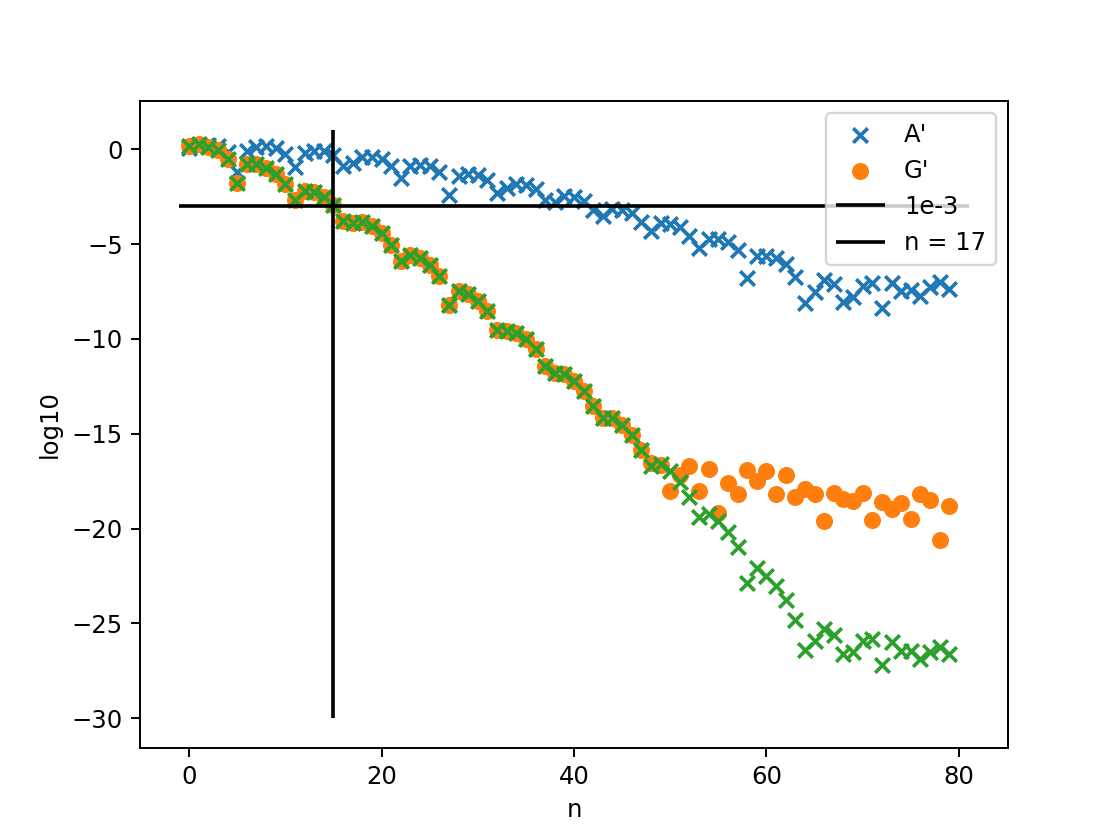

Text(0.5, 0, 'n')

In [59]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'o', label = r"G'")
#plt.scatter(np.arange(80), np.log10(s_b40), marker = 'o')
plt.scatter(np.arange(80), np.log10(np.abs( np.diag(s_b40).dot(A_trans)  )   ), marker = 'x')
#plt.scatter(np.arange(80), np.log10(np.abs(G_trans_test)), marker = 'x')

plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 15, ymin = -30, ymax = 1, color = 'k', label = r'n = 15')
#plt.hlines(y = np.log10(1e-5), xmin = -1, xmax = 81, color = 'g', label = r'1e-5')
#plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')

<IPython.core.display.Javascript object>


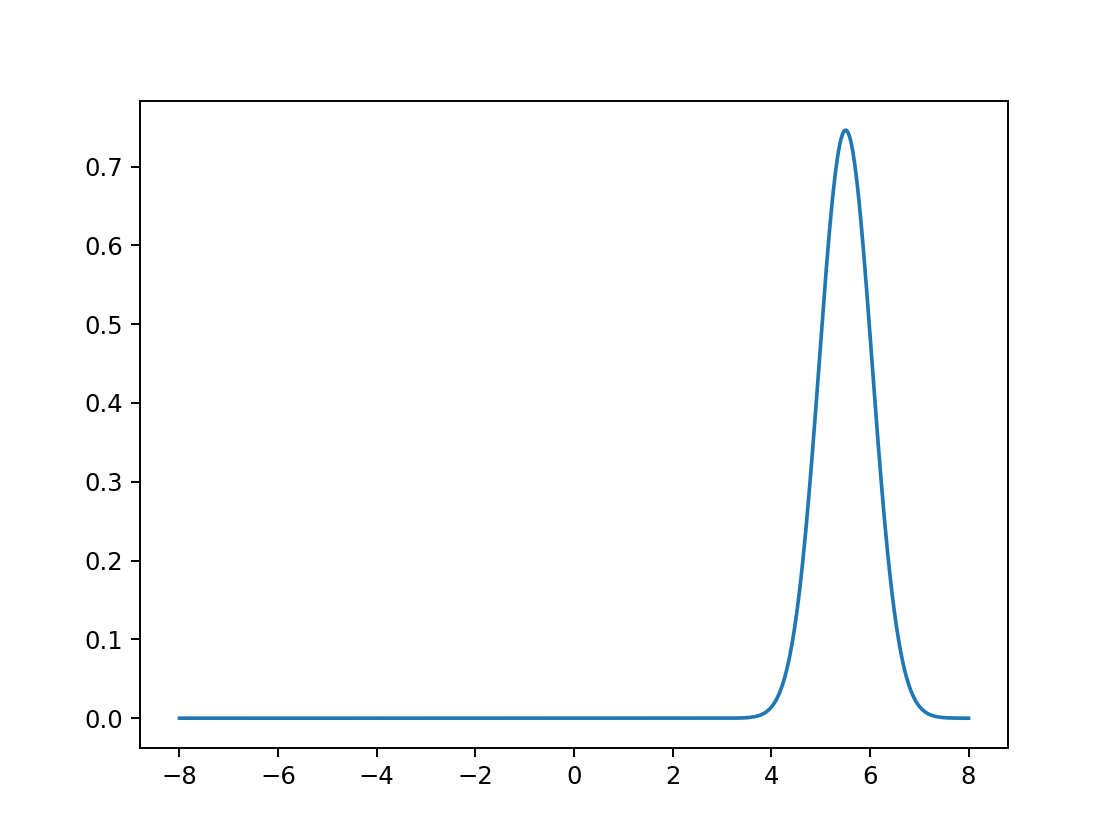

In [49]:
plt.plot(omega, A_omega_val[988*4 + 10,:])

In [50]:
A_trans = vh_b40[:80,:].dot(A_omega_val[988*4+10,:])
G_trans = u_b40.T.dot(Gl_val[988*4+10,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])

G_trans_noisy = u_b40.T.dot(Gl_val_noise[988*4+10,:])

<IPython.core.display.Javascript object>


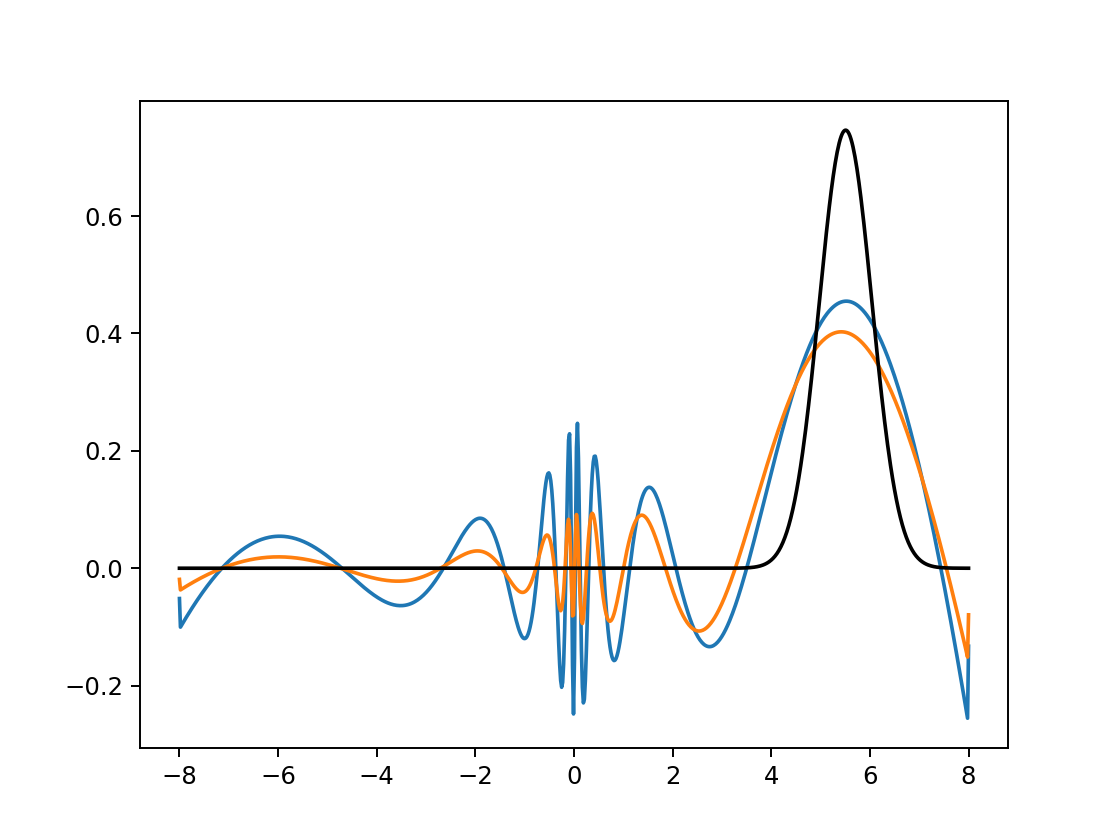

In [52]:
plt.plot(omega, vh_b40.T[:,:17].dot((np.diag(1/s_b40)[:17,:17].dot(G_trans_noisy[:17]))))
plt.plot(omega, vh_b40.T[:,:17].dot(A_trans[:17]))
plt.plot(omega, A_omega_val[988*4+10,:], color = 'k')

<IPython.core.display.Javascript object>


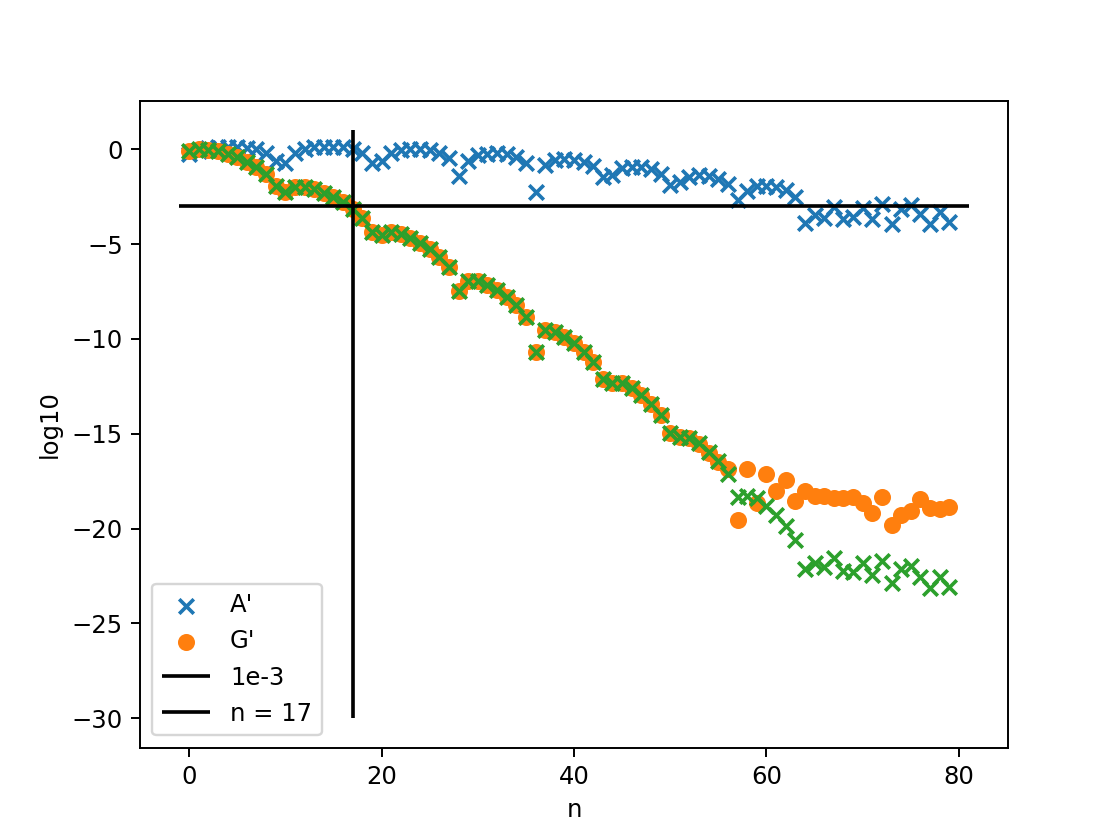

Text(0.5, 0, 'n')

In [55]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'o', label = r"G'")
#plt.scatter(np.arange(80), np.log10(s_b40), marker = 'o')
plt.scatter(np.arange(80), np.log10(np.abs( np.diag(s_b40).dot(A_trans)  )   ), marker = 'x')
#plt.scatter(np.arange(80), np.log10(np.abs(G_trans_test)), marker = 'x')

plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 17, ymin = -30, ymax = 1, color = 'k', label = r'n = 17')
#plt.hlines(y = np.log10(1e-5), xmin = -1, xmax = 81, color = 'g', label = r'1e-5')
#plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')

In [20]:
A_trans = vh_b40[:80,:].dot(A_omega_val[122,:])
G_trans = u_b40.T.dot(Gl_val[122,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])

G_trans_noisy = u_b40.T.dot(Gl_val_noise[122,:])

<IPython.core.display.Javascript object>


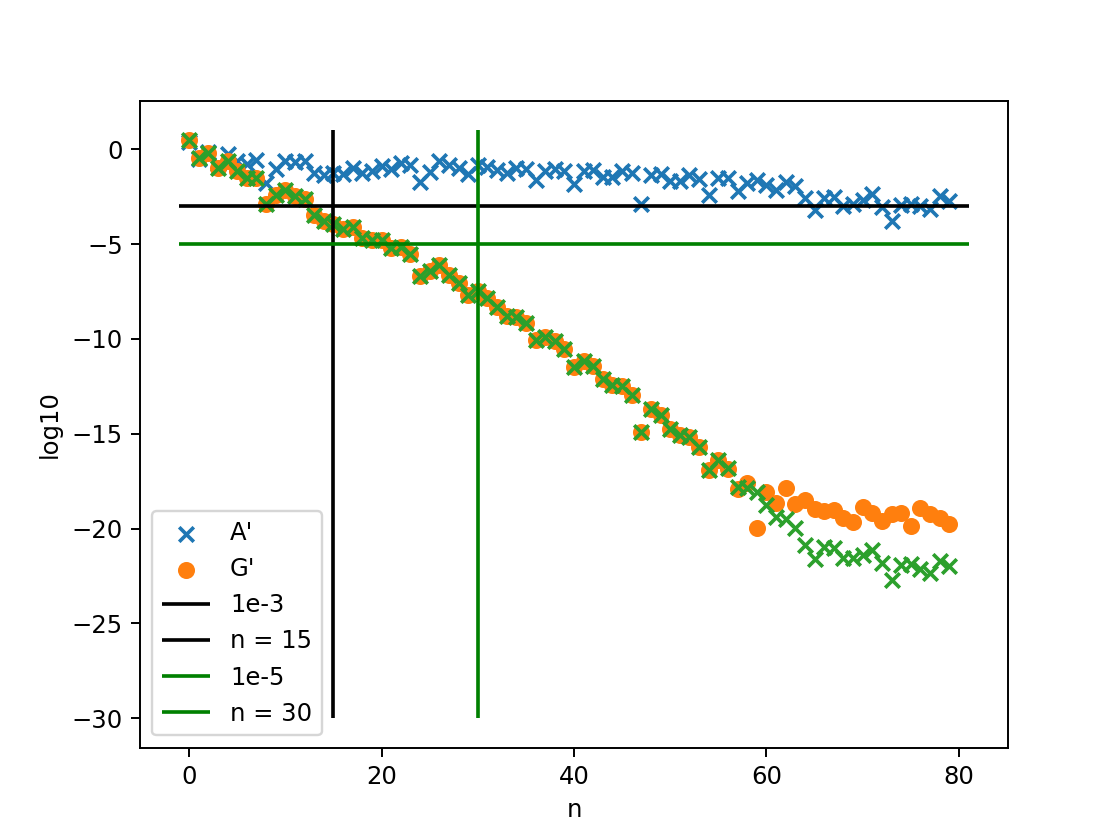

Text(0.5, 0, 'n')

In [21]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'o', label = r"G'")
#plt.scatter(np.arange(80), np.log10(s_b40), marker = 'o')
plt.scatter(np.arange(80), np.log10(np.abs( np.diag(s_b40).dot(A_trans)  )   ), marker = 'x')
#plt.scatter(np.arange(80), np.log10(np.abs(G_trans_test)), marker = 'x')

plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 15, ymin = -30, ymax = 1, color = 'k', label = r'n = 15')
plt.hlines(y = np.log10(1e-5), xmin = -1, xmax = 81, color = 'g', label = r'1e-5')
plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')

In [22]:
A_trans = vh_b40[:80,:].dot(A_omega_val[124,:])
G_trans = u_b40.T.dot(Gl_val[124,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])
G_trans_noisy = u_b40.T.dot(Gl_val_noise[124,:])

<IPython.core.display.Javascript object>


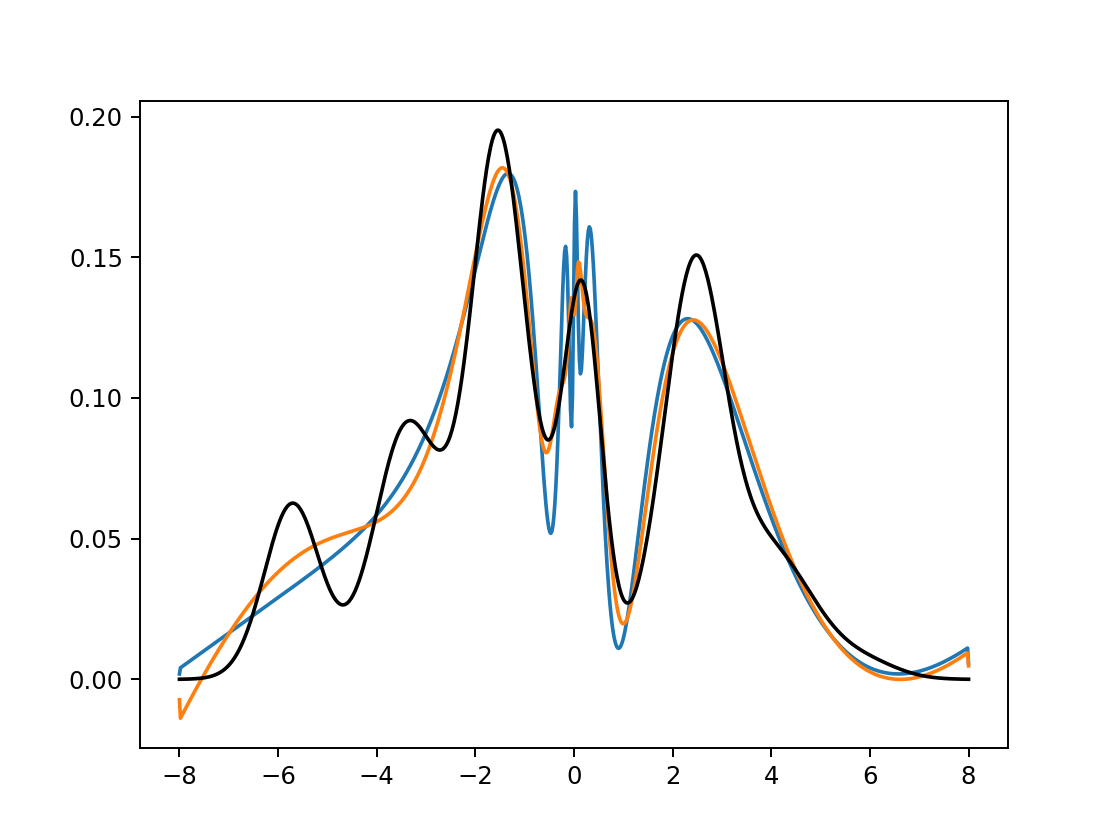

In [23]:
plt.plot(omega, vh_b40.T[:,:17].dot((np.diag(1/s_b40)[:17,:17].dot(G_trans_noisy[:17]))))
plt.plot(omega, vh_b40.T[:,:17].dot(A_trans[:17]))
plt.plot(omega, A_omega_val[124,:], color = 'k')

<IPython.core.display.Javascript object>


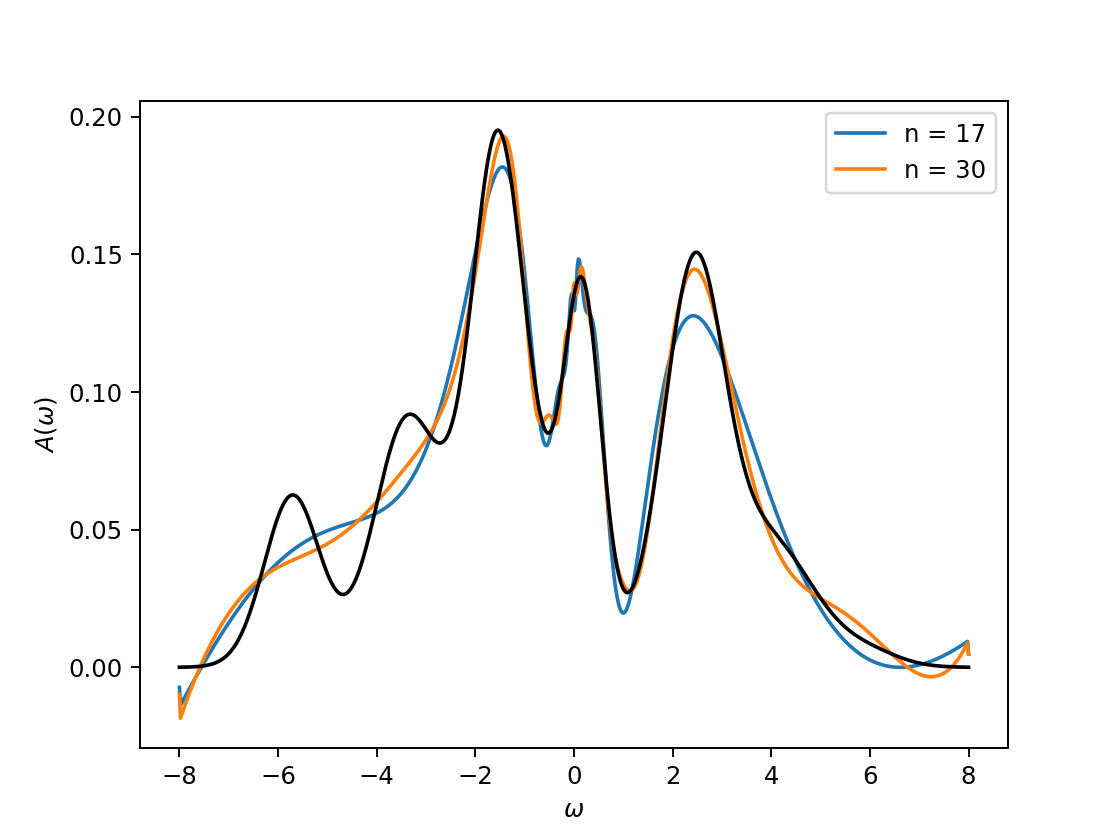

In [24]:
plt.plot(omega, vh_b40.T[:,:17].dot(A_trans[:17]), label = "n = 17")
#plt.plot(omega, vh_b40.T[:,:20].dot(A_trans[:20]))
plt.plot(omega, vh_b40.T[:,:25].dot(A_trans[:25]), label = "n = 30")
#plt.plot(omega, vh_b40.T[:,:42].dot(A_trans[:42]))
plt.legend()
plt.xlabel(r"$\omega$")
plt.ylabel(r"$A(\omega)$")
plt.plot(omega, A_omega_val[124,:], color = 'k', label = "ground truth")

<IPython.core.display.Javascript object>


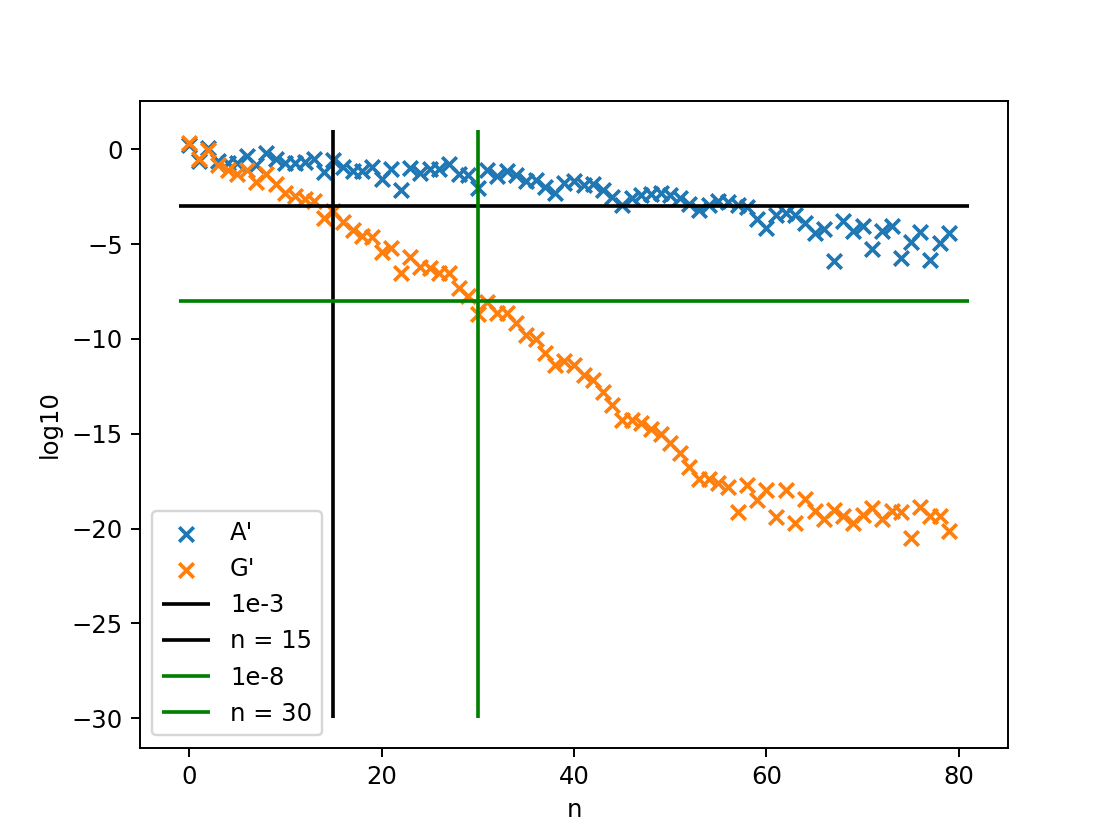

Text(0.5, 0, 'n')

In [25]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'x', label = r"G'")


plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 15, ymin = -30, ymax = 1, color = 'k', label = r'n = 15')
plt.hlines(y = np.log10(1e-8), xmin = -1, xmax = 81, color = 'g', label = r'1e-8')
plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')

In [26]:
A_trans = vh_b40[:80,:].dot(A_omega_val[123,:])
G_trans = u_b40.T.dot(Gl_val[123,:])#np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_omega_val[123,:])
G_trans_noisy = u_b40.T.dot(Gl_val_noise[123,:])

<IPython.core.display.Javascript object>


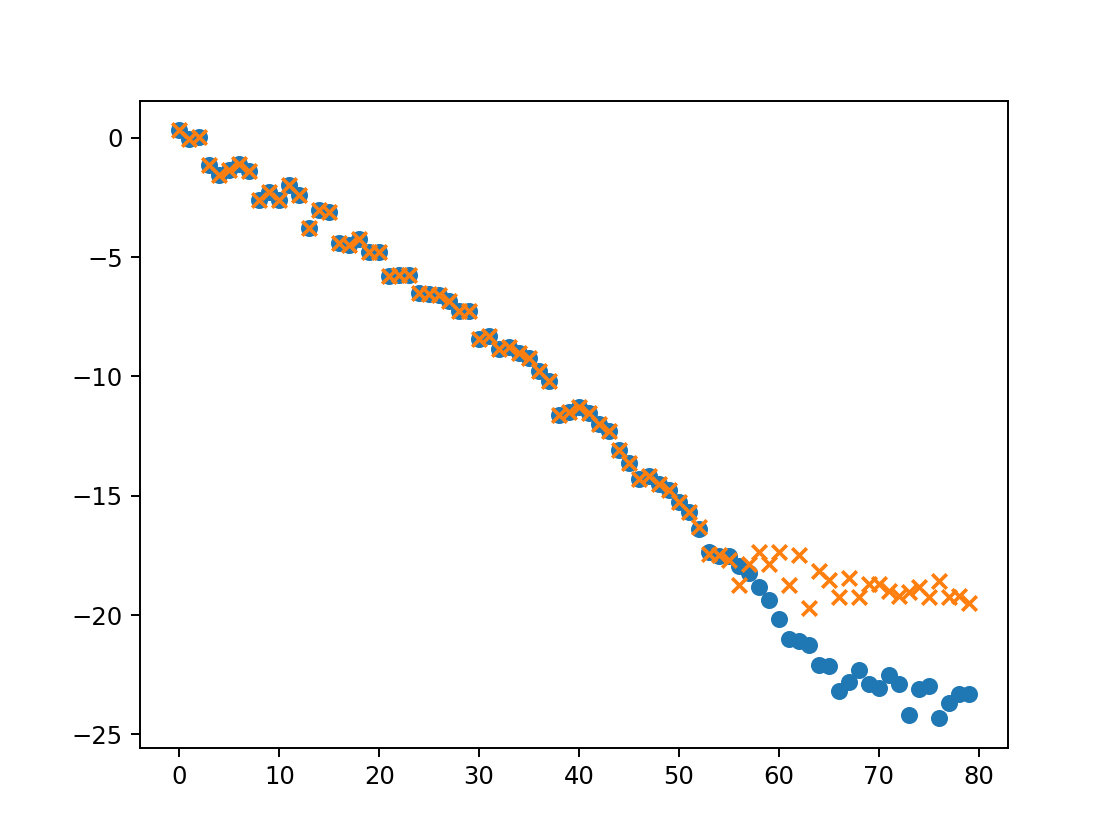

In [27]:
plt.scatter(np.arange(80), np.log10(np.abs(np.diag(s_b40).dot(A_trans))))
#plt.scatter(np.arange(80), G_trans[:80], marker = 'x')
plt.scatter(np.arange(80), np.log10(np.abs(G_trans[:80])), marker = 'x')

In [28]:
plt.scatter(np.arange(80), G_trans)
plt.scatter(np.arange(80), G_trans_noisy, marker = 'x')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


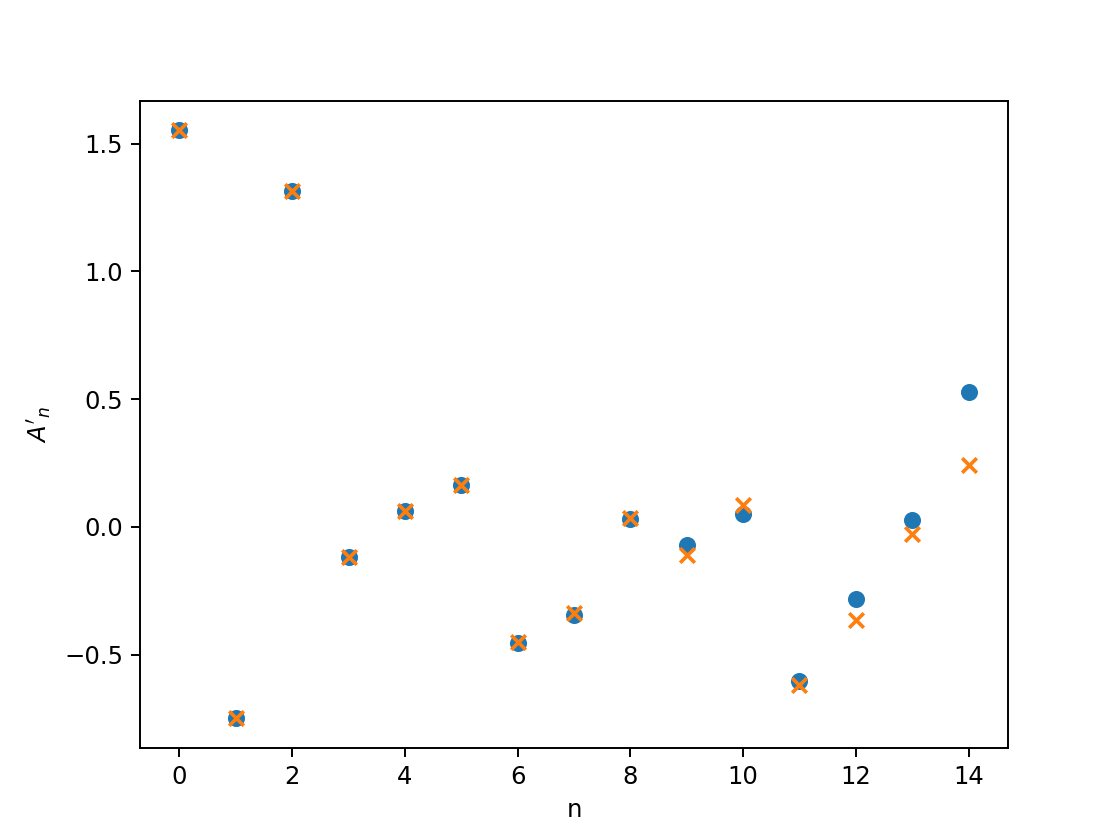

In [29]:
fig, ax = plt.subplots()
ax.scatter(np.arange(15), (np.diag(1/s_b40)[:15,:15].dot(G_trans_noisy[:15])), label = r'$A^{\'} from G with noise level 1e-3$')
ax.scatter(np.arange(15), A_trans[:15], marker = 'x', label = r'noiseless $A^{\'}$')

ax.set_xlabel("n")
ax.set_ylabel(r"$A'_{n}$")

ax.legend()

In [30]:
G_Test=  np.copy(G_trans)

In [31]:
G_Test[np.abs(G_Test) < 5e-4]

array([-1.66391515e-04,  3.94094593e-05,  3.17447367e-05, -5.97492230e-05,
        1.63289744e-05, -1.59595006e-05,  1.69176303e-06,  1.86026323e-06,
       -1.85470114e-06,  3.28862133e-07,  2.98509398e-07,  2.51012684e-07,
        1.42732583e-07,  5.49498799e-08, -5.54294599e-08,  3.67924664e-09,
        4.91609803e-09, -1.36969040e-09,  1.64824070e-09,  9.39994160e-10,
       -5.70180932e-10, -1.73388254e-10,  6.57227162e-11,  2.38517542e-12,
        3.26149881e-12, -5.49010016e-12,  2.91475770e-12, -1.02014338e-12,
        5.33561708e-13, -8.70904643e-14, -2.45002081e-14, -5.12645960e-15,
       -7.01770152e-15, -3.21809187e-15, -1.74193625e-15, -5.52018350e-16,
       -2.06893212e-16, -4.89523694e-17, -3.81278304e-18, -3.23459647e-18,
        1.96317713e-18,  1.84487317e-19, -1.35345910e-18,  4.60136391e-18,
       -1.43522747e-18,  4.25562099e-18,  1.91314915e-19,  3.24274122e-18,
       -1.99157276e-20, -6.83980180e-19, -3.09967755e-19,  5.98609454e-20,
       -3.71892059e-19,  

In [32]:
G_Test[np.abs(G_Test) < 5e-4] = 0

<IPython.core.display.Javascript object>


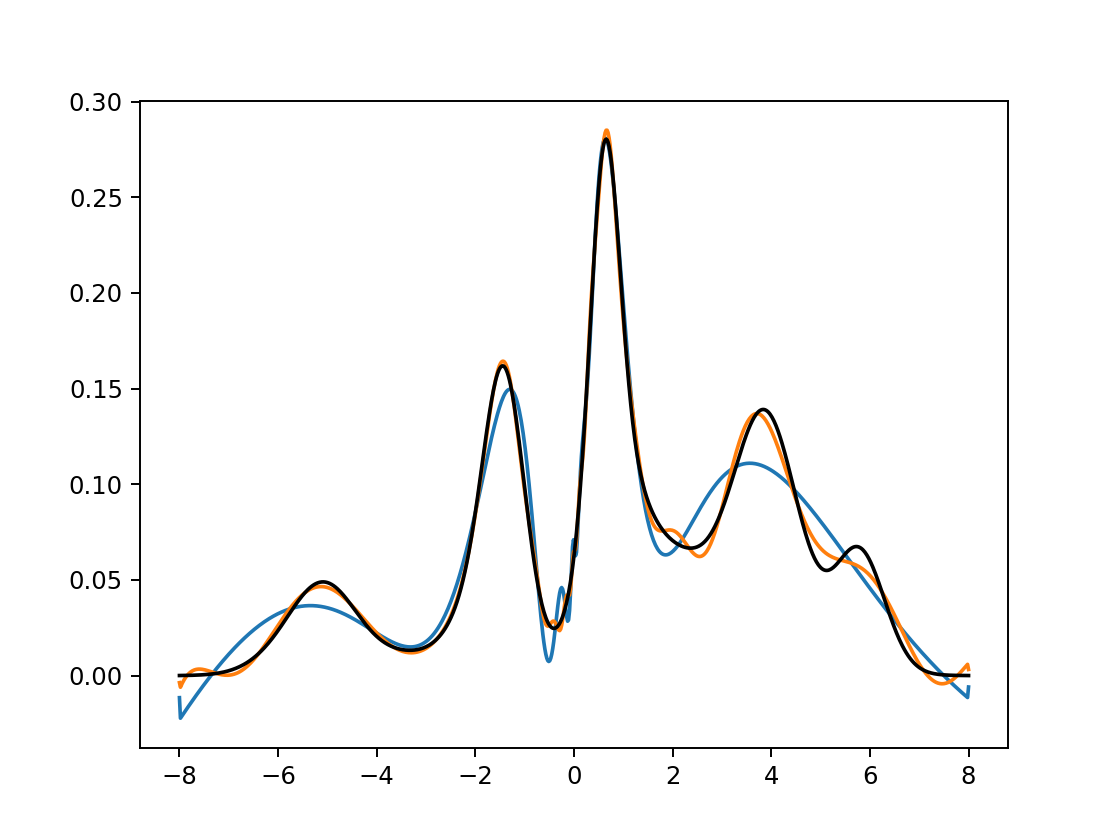

In [42]:
plt.plot(omega, vh_b40.T[:,:35].dot((np.diag(1/s_b40)[:35,:35].dot(G_Test[:35]))))
plt.plot(omega, vh_b40.T[:,:35].dot(A_trans[:35]))
plt.plot(omega, A_omega_val[123,:], color = 'k')

<IPython.core.display.Javascript object>


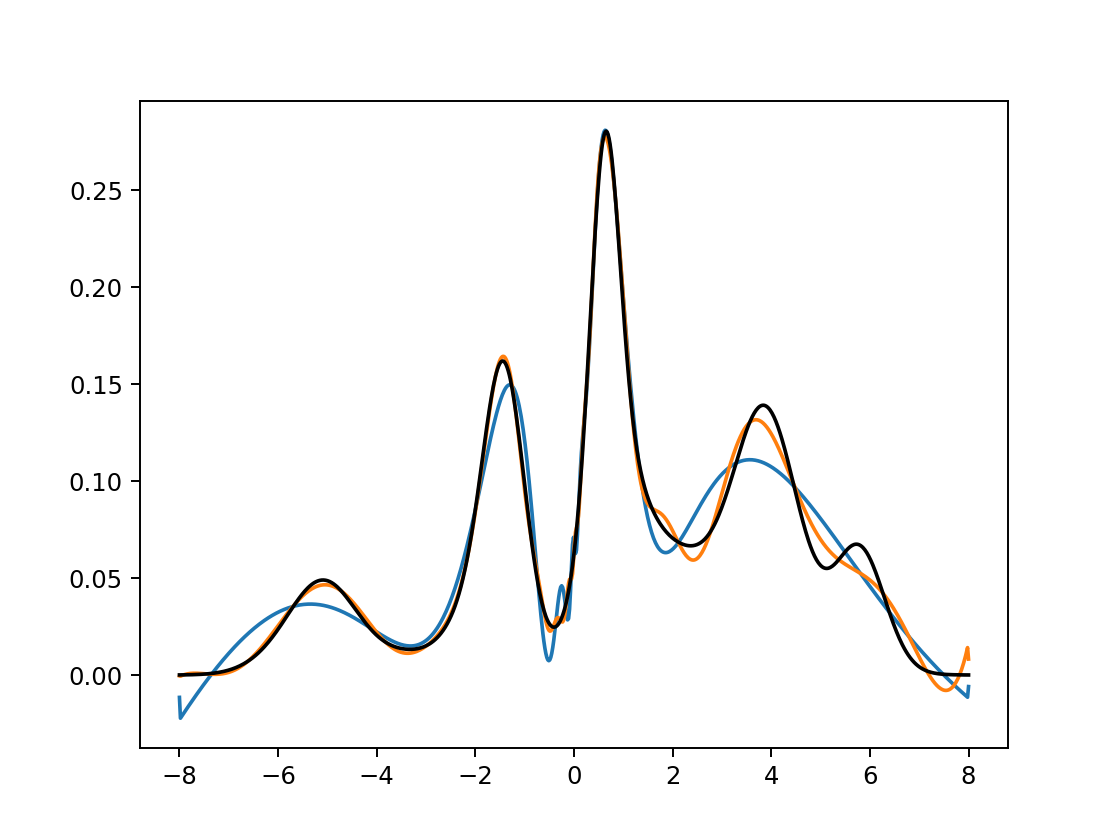

In [34]:
plt.plot(omega, vh_b40.T[:,:30].dot((np.diag(1/s_b40)[:30,:30].dot(G_Test[:30]))))
plt.plot(omega, vh_b40.T[:,:30].dot(A_trans[:30]))
plt.plot(omega, A_omega_val[123,:], color = 'k')

<IPython.core.display.Javascript object>


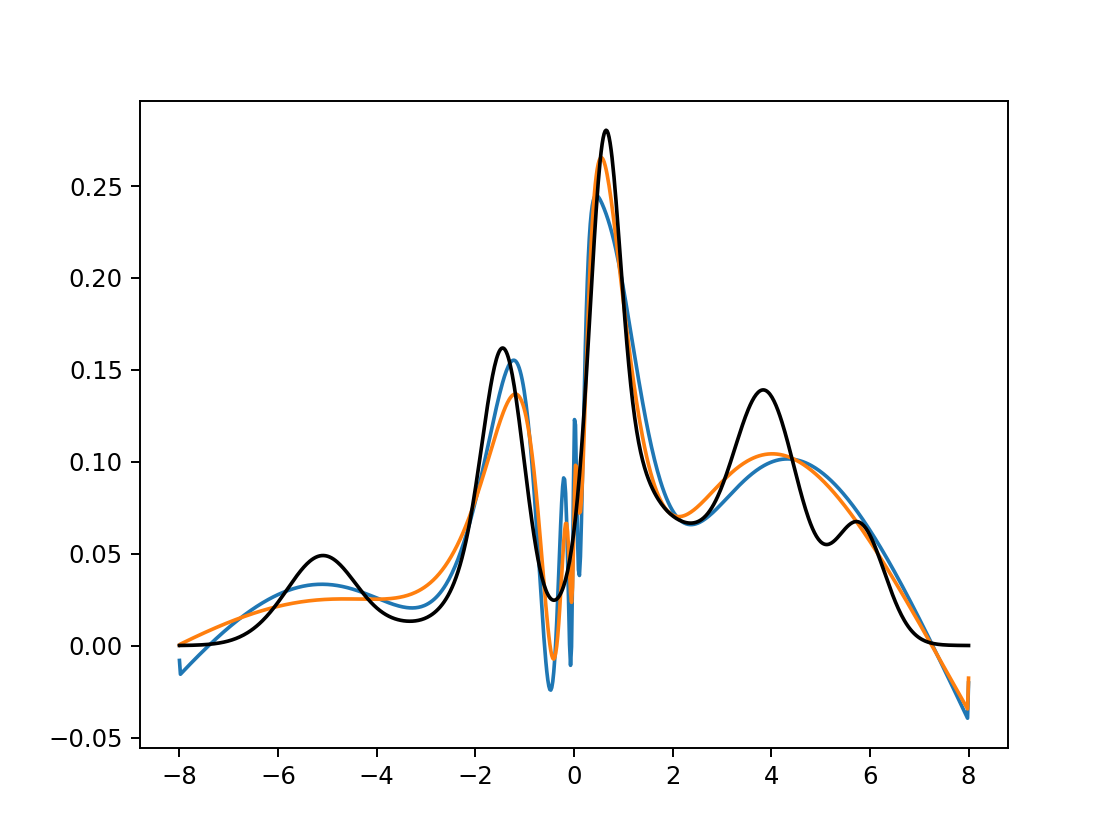

In [35]:
plt.plot(omega, vh_b40.T[:,:15].dot((np.diag(1/s_b40)[:15,:15].dot(G_trans_noisy[:15]))))
plt.plot(omega, vh_b40.T[:,:15].dot(A_trans[:15]))
plt.plot(omega, A_omega_val[123,:], color = 'k')

In [36]:
plt.plot(omega, vh_b40.T[:,:15].dot(A_trans[:15]), label = "n = 15")
#plt.plot(omega, vh_b40.T[:,:20].dot(A_trans[:20]))
plt.plot(omega, vh_b40.T[:,:30].dot(A_trans[:30]), label = "n = 30")
#plt.plot(omega, vh_b40.T[:,:42].dot(A_trans[:42]))
plt.legend()
plt.xlabel(r"$\omega$")
plt.ylabel(r"$A(\omega)$")
plt.plot(omega, A_omega_val[123,:], color = 'k', label = "ground truth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


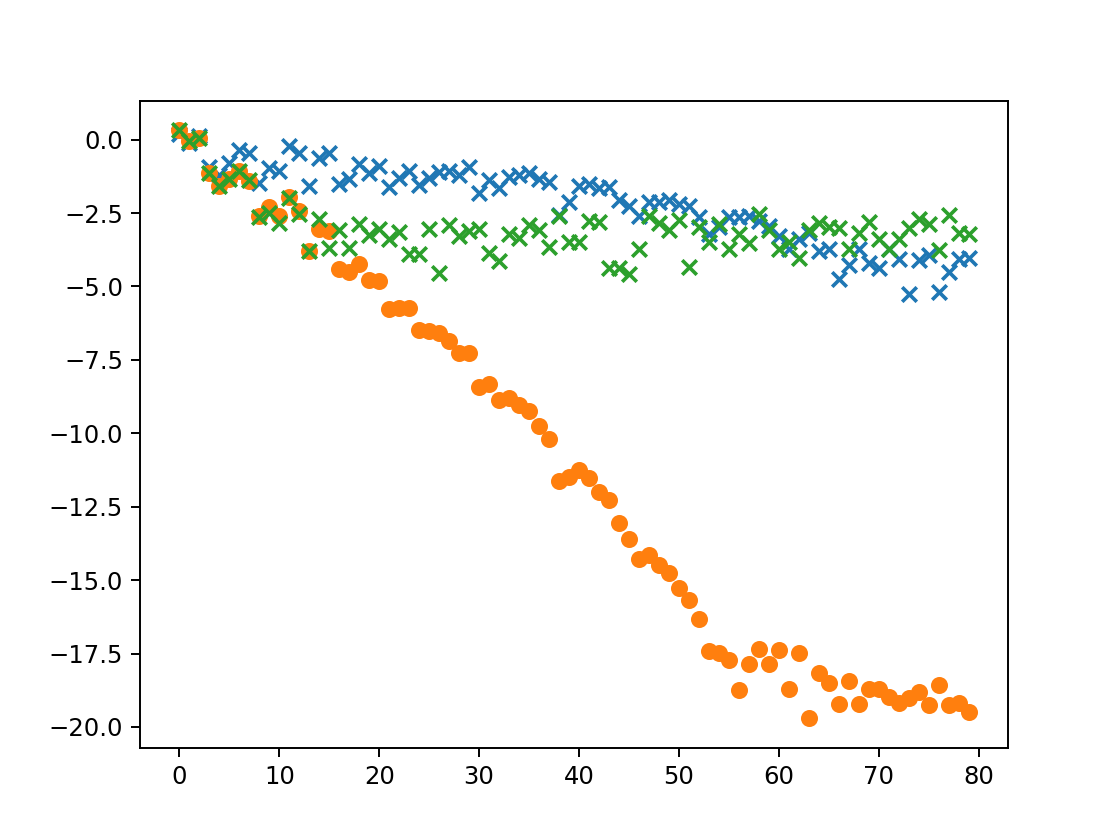

In [37]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r'$A\'_{n}$')
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'o', label = r'$G\'_{n}$')
plt.scatter(np.arange(80), np.log10(np.abs(G_trans_noisy)), marker = 'x', label = r'$G\'_{n}$')

<IPython.core.display.Javascript object>


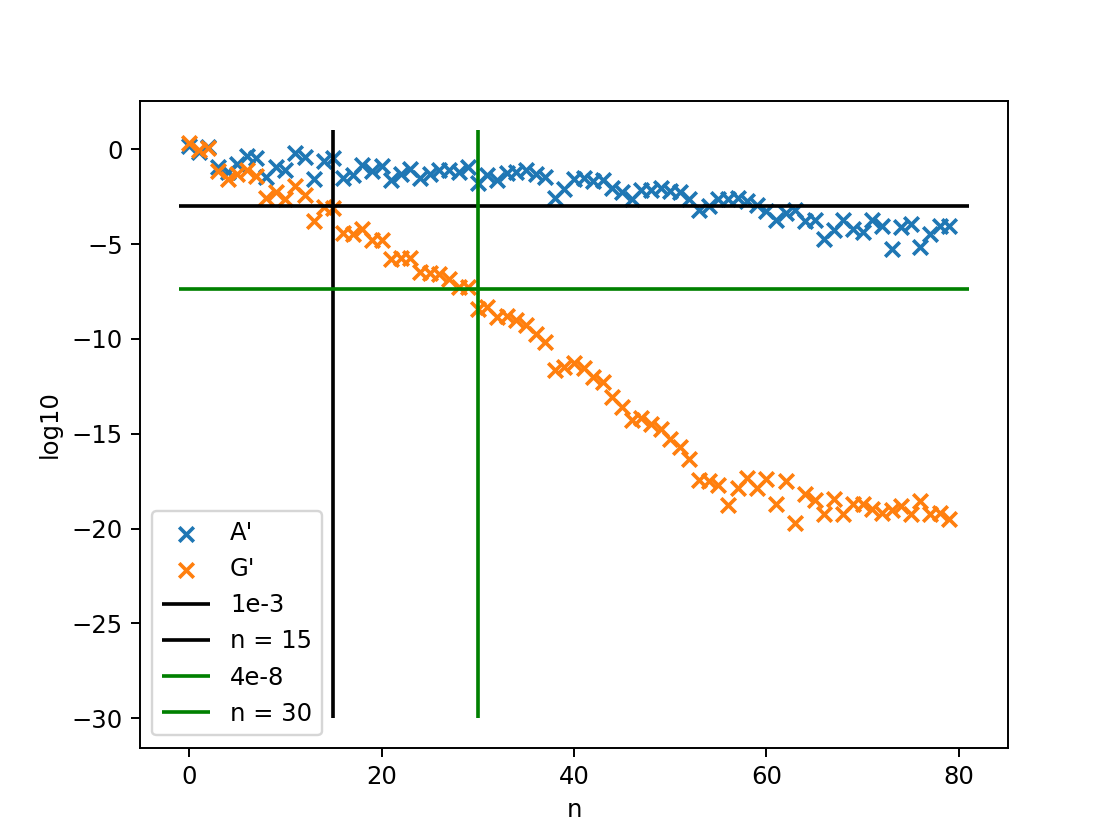

Text(0.5, 0, 'n')

In [38]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label= r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'x', label = r"G'")


plt.legend()
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'k', label = r'1e-3')
plt.vlines(x = 15, ymin = -30, ymax = 1, color = 'k', label = r'n = 15')
plt.hlines(y = np.log10(4e-8), xmin = -1, xmax = 81, color = 'g', label = r'4e-8')
plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'g', label = r'n = 30')
plt.legend()
#plt.hlines(y = -7, xmin = -1, xmax = 81, color = 'r', label = r'noise level 1e-7')
#plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'r', label = r'n = 32')
plt.ylabel('log10')
plt.xlabel('n')


In [304]:
A_FTPS = np.load("../../FTPS_SVO/A_omega_SVO.npy")[:,0,0]/np.pi

G_FTPS = np.load("../../FTPS_SVO/Gl_FTPS_mesh.npy")

In [305]:
A_trans = vh_b40[:80,:].dot(A_FTPS)
G_trans = np.diag(s_b40).dot(vh_b40[:80,:]).dot(A_FTPS)

<IPython.core.display.Javascript object>


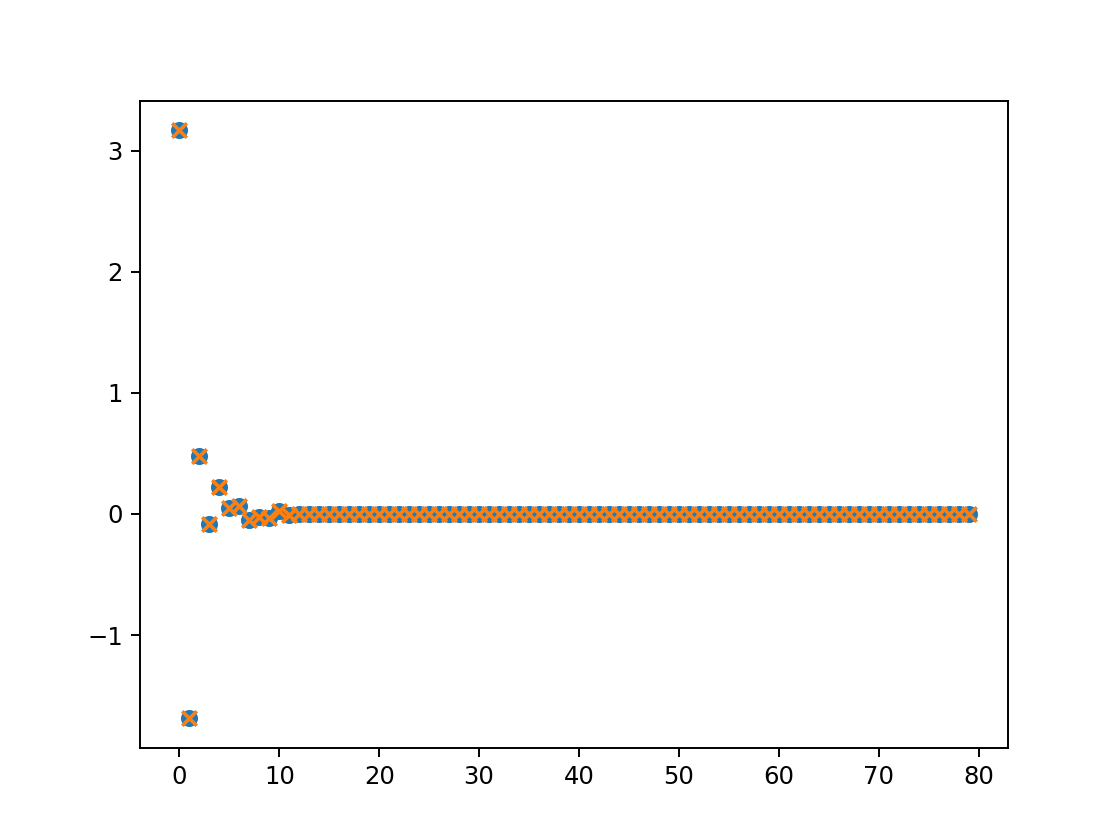

In [306]:
plt.scatter(np.arange(80), np.diag(s_b40).dot(A_trans))
plt.scatter(np.arange(80), G_trans[:80], marker = 'x')

In [307]:
plt.scatter(np.arange(80), (np.diag(1/s_b40)[:,:80].dot(G_trans[:80])))
plt.scatter(np.arange(80), A_trans[:80], marker = 'x')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


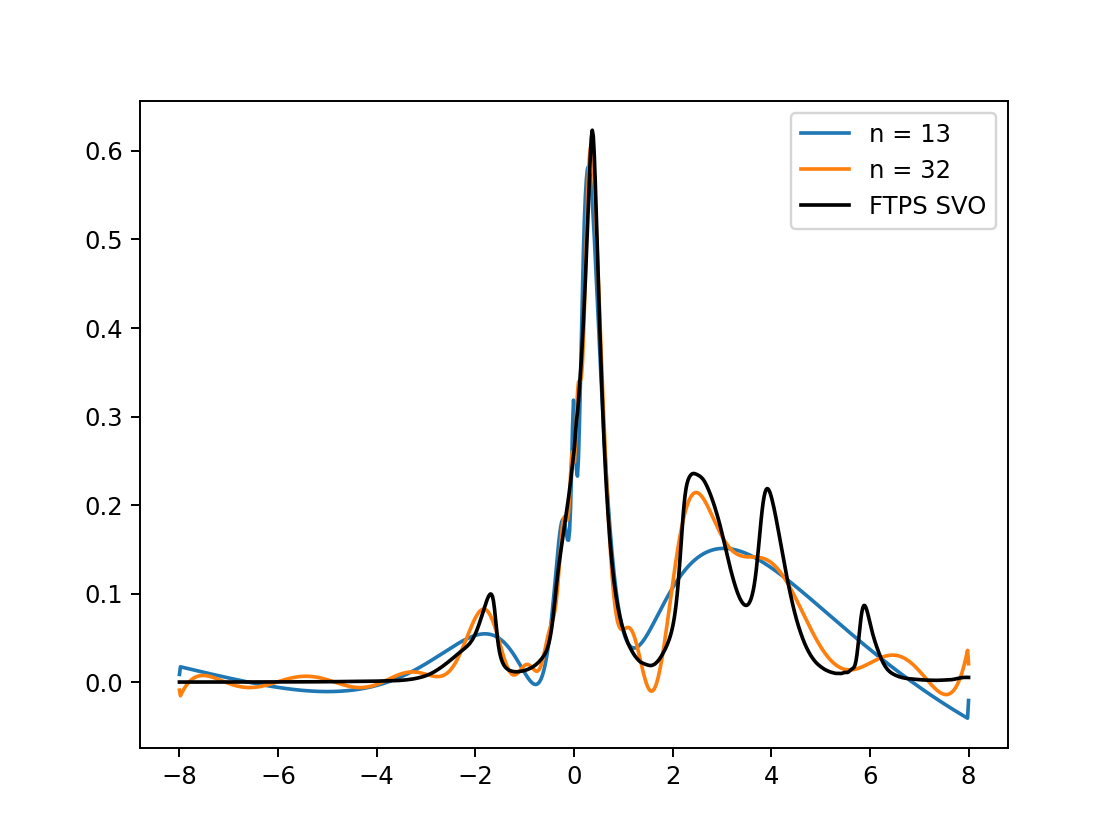

In [312]:
#plt.plot(omega, vh_b40.T[:,:15].dot(A_trans[:15]))
plt.plot(omega, vh_b40.T[:,:13].dot(A_trans[:13]), label='n = 13')
#plt.plot(omega, vh_b40.T[:,:30].dot(A_trans[:30]))
plt.plot(omega, vh_b40.T[:,:32].dot(A_trans[:32]), label = 'n = 32')
plt.plot(omega, A_FTPS[:], color = 'k', label = 'FTPS SVO')
plt.legend()

<IPython.core.display.Javascript object>


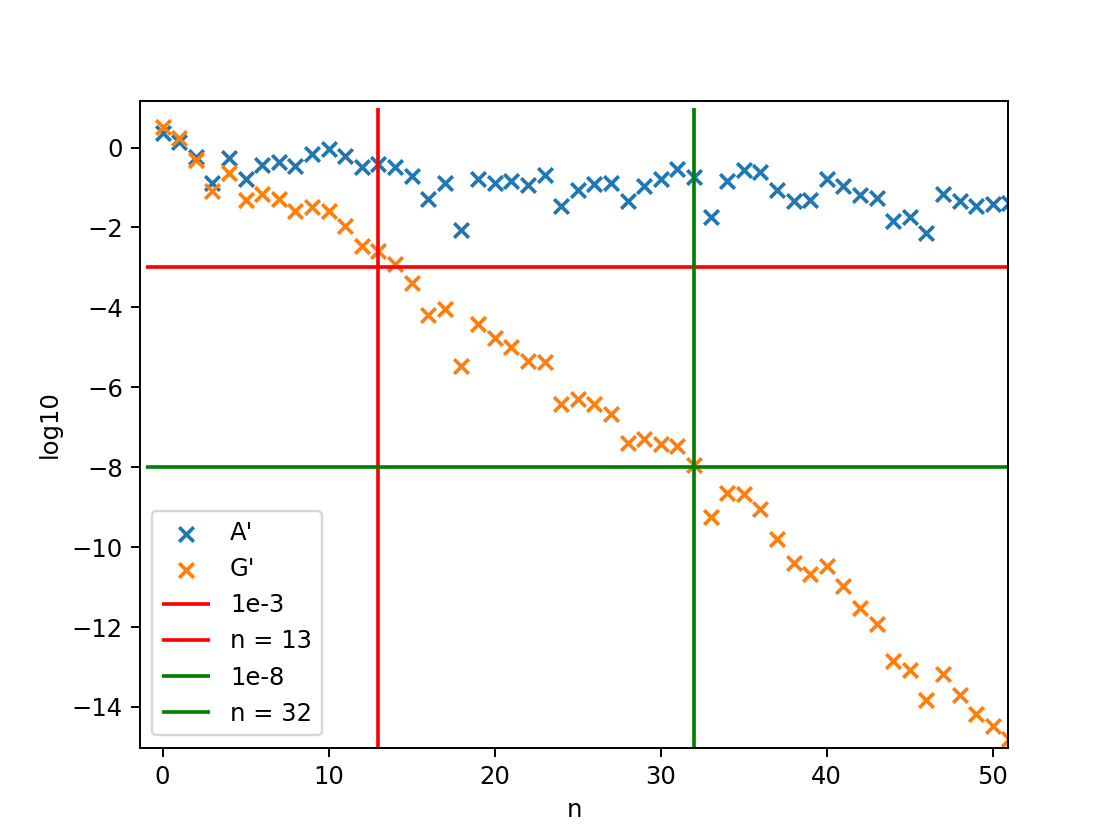

Text(0, 0.5, 'log10')

In [320]:
plt.scatter(np.arange(80), np.log10(np.abs(A_trans)), marker = 'x', label = r"A'")
plt.scatter(np.arange(80), np.log10(np.abs(G_trans)), marker = 'x', label = r"G'")
plt.hlines(y = -3, xmin = -1, xmax = 81, color = 'r', label = '1e-3')
plt.vlines(x = 13, ymin = -30, ymax = 1, color = 'r', label = 'n = 13')
#plt.vlines(x = 30, ymin = -30, ymax = 1, color = 'r')
plt.hlines(y = -8, xmin = -1, xmax = 81, color = 'g', label = '1e-8')
plt.vlines(x = 32, ymin = -30, ymax = 1, color = 'g', label = 'n = 32')
plt.legend()

plt.xlabel("n")
plt.ylabel("log10")

<IPython.core.display.Javascript object>


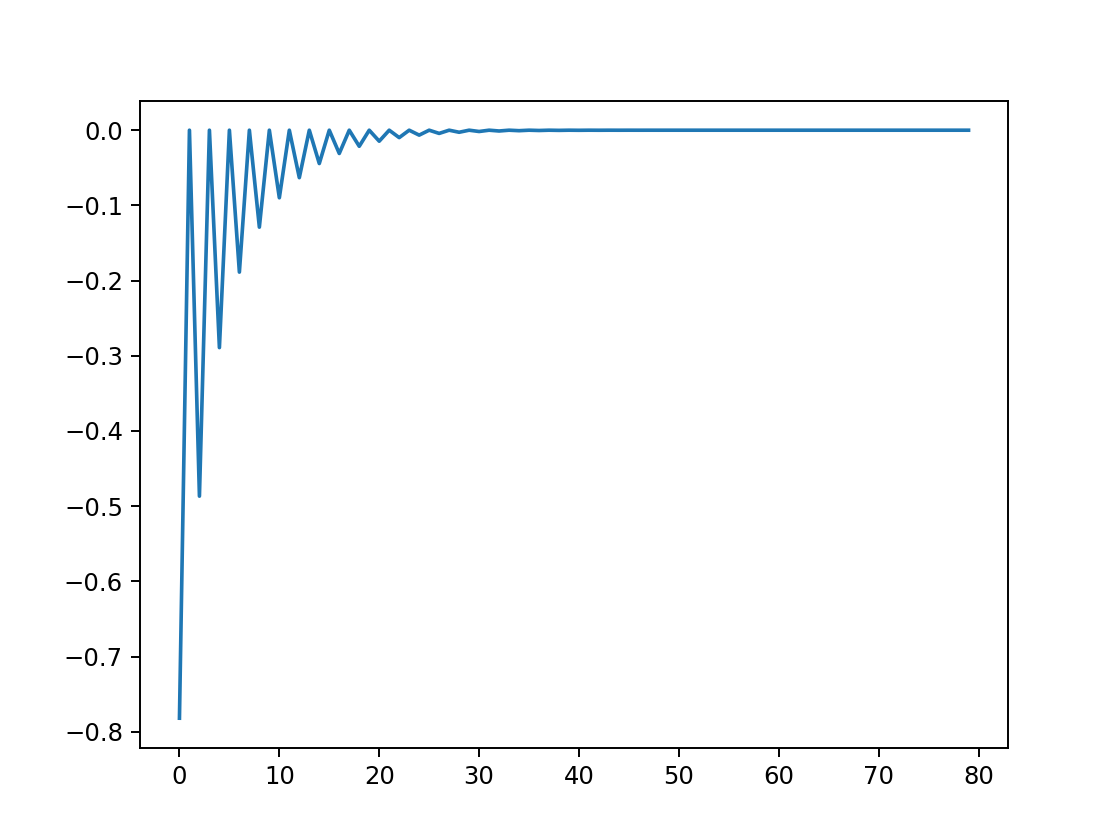

In [21]:
plt.plot(u_b40[:,0])

<IPython.core.display.Javascript object>


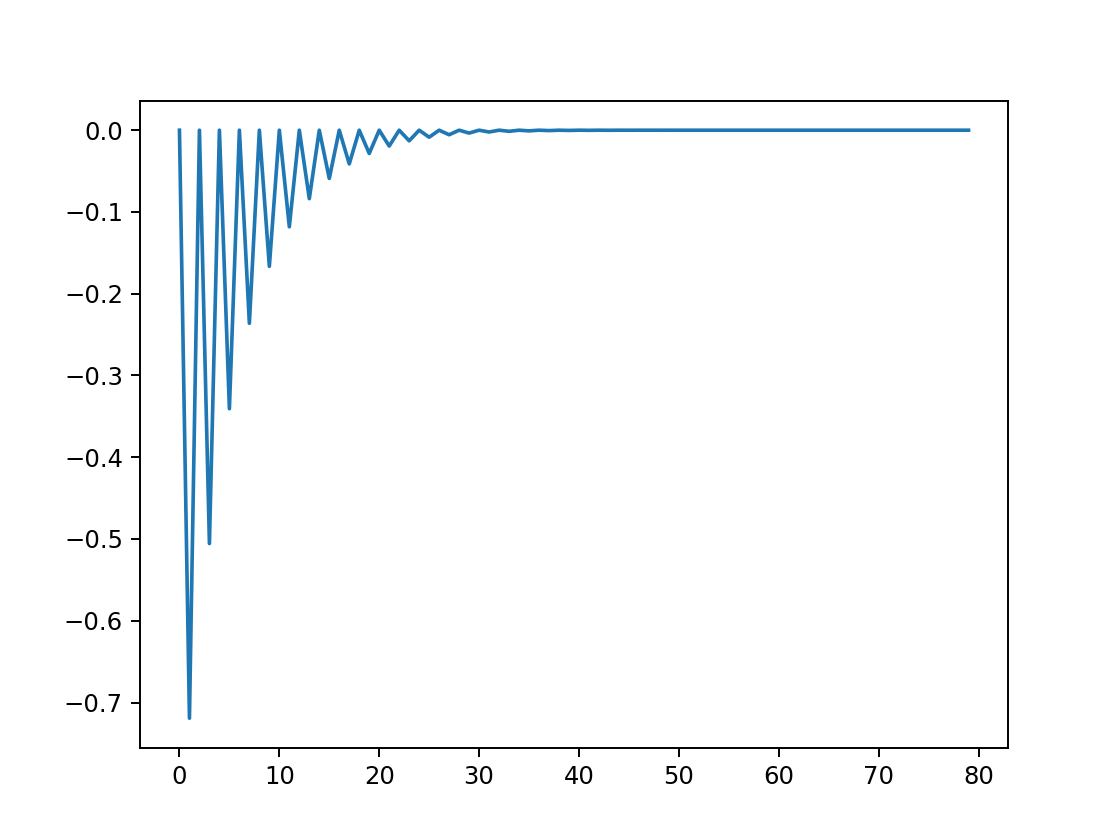

In [22]:
plt.plot(u_b40[:,1])

<IPython.core.display.Javascript object>


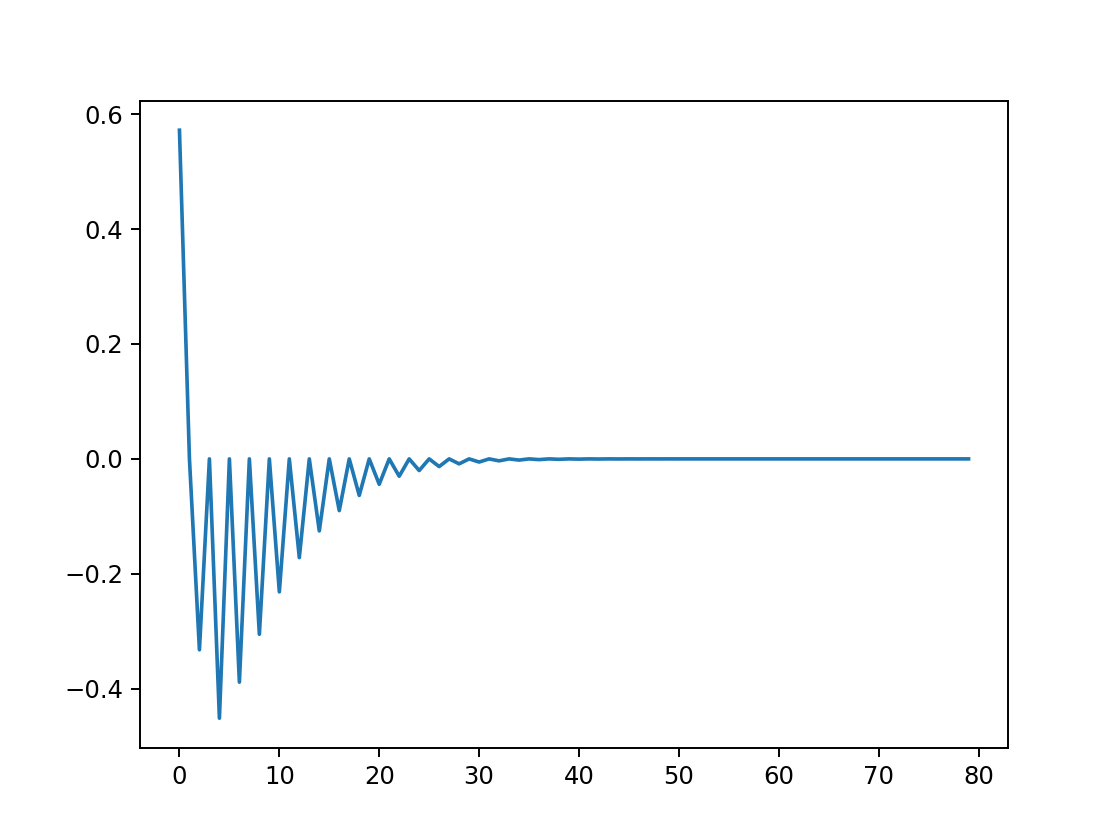

In [23]:
plt.plot(u_b40[:,2])

<IPython.core.display.Javascript object>


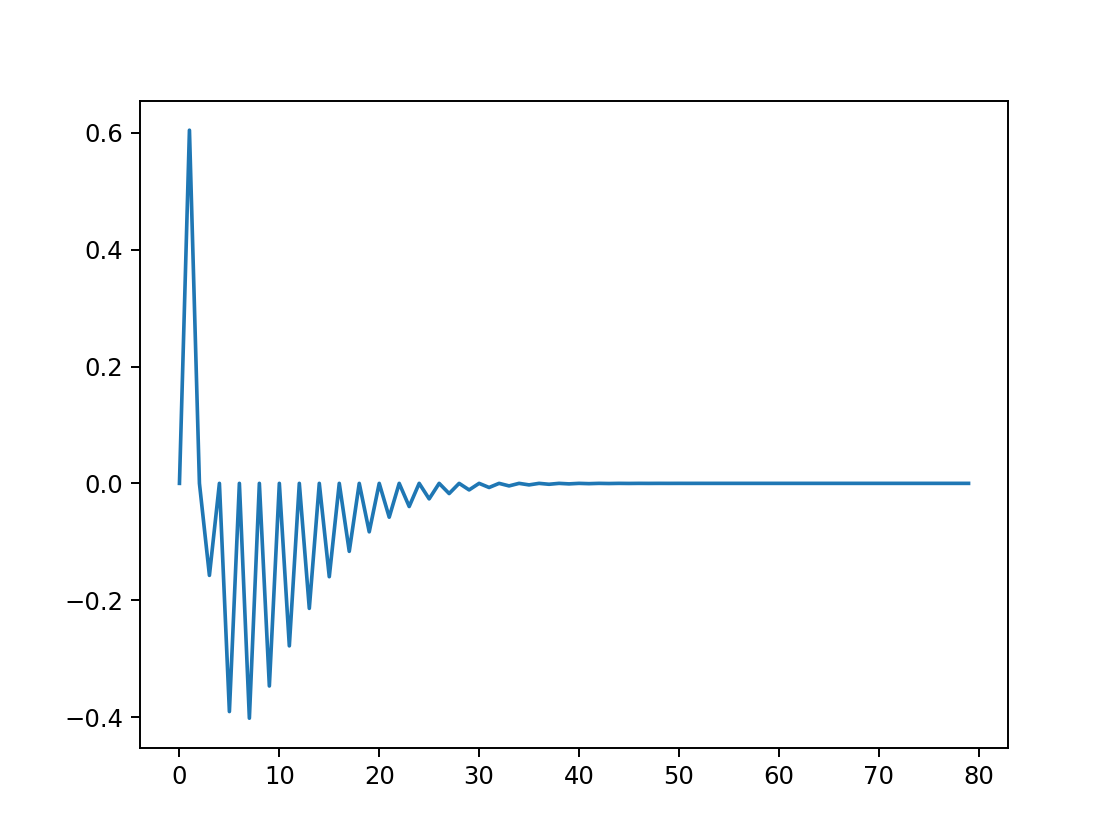

In [24]:
plt.plot(u_b40[:,3])

In [28]:
plt.plot(u_b40[:,4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


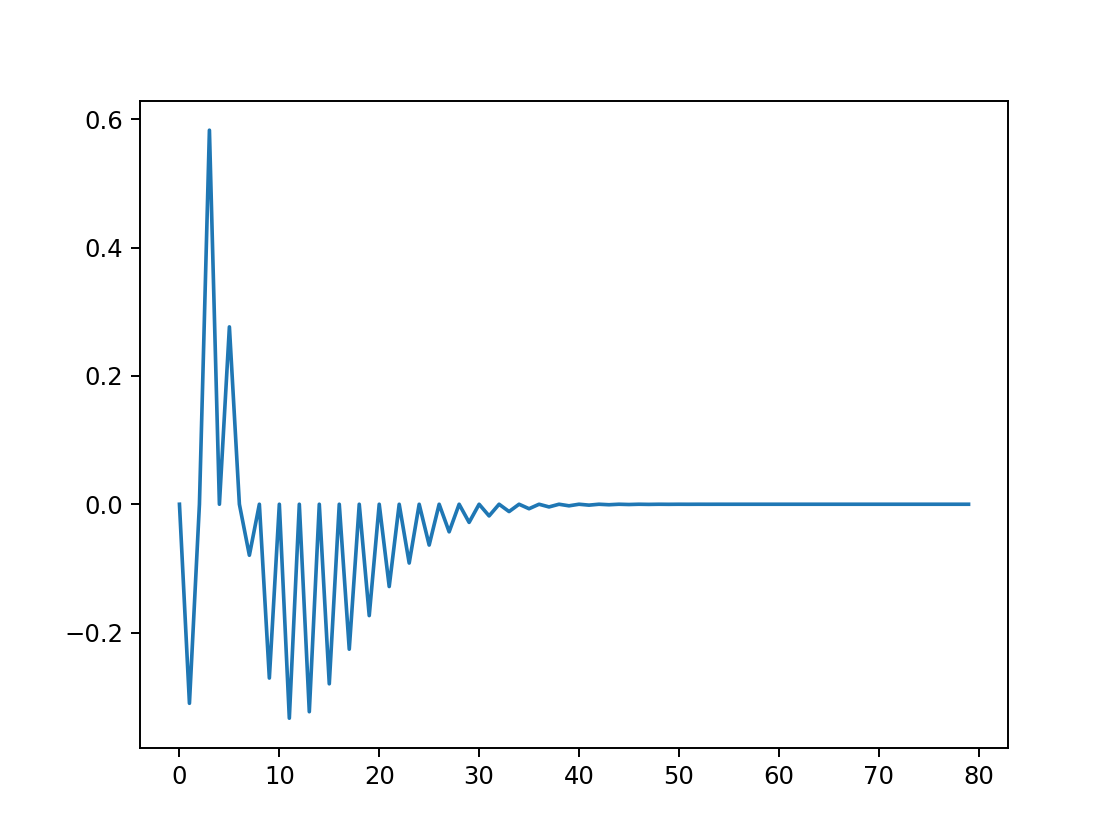

In [29]:
plt.plot(u_b40[:,5])

<IPython.core.display.Javascript object>


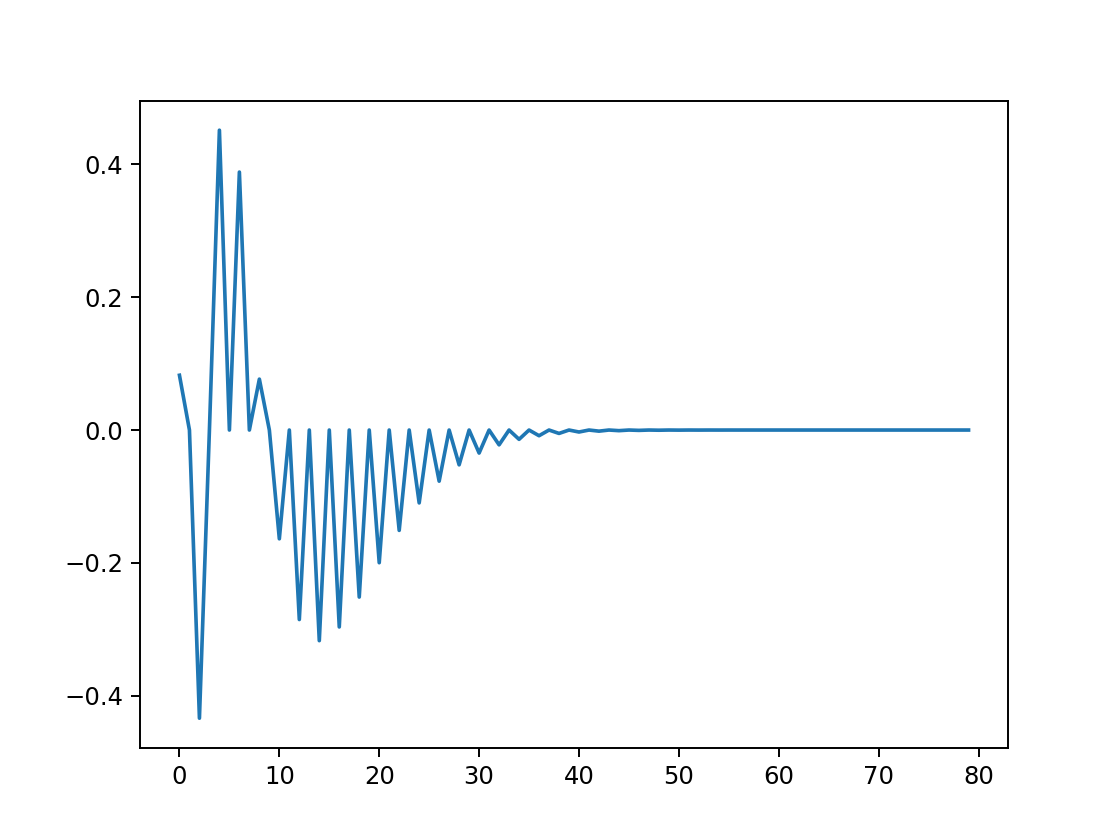

In [30]:
plt.plot(u_b40[:,6])

<IPython.core.display.Javascript object>


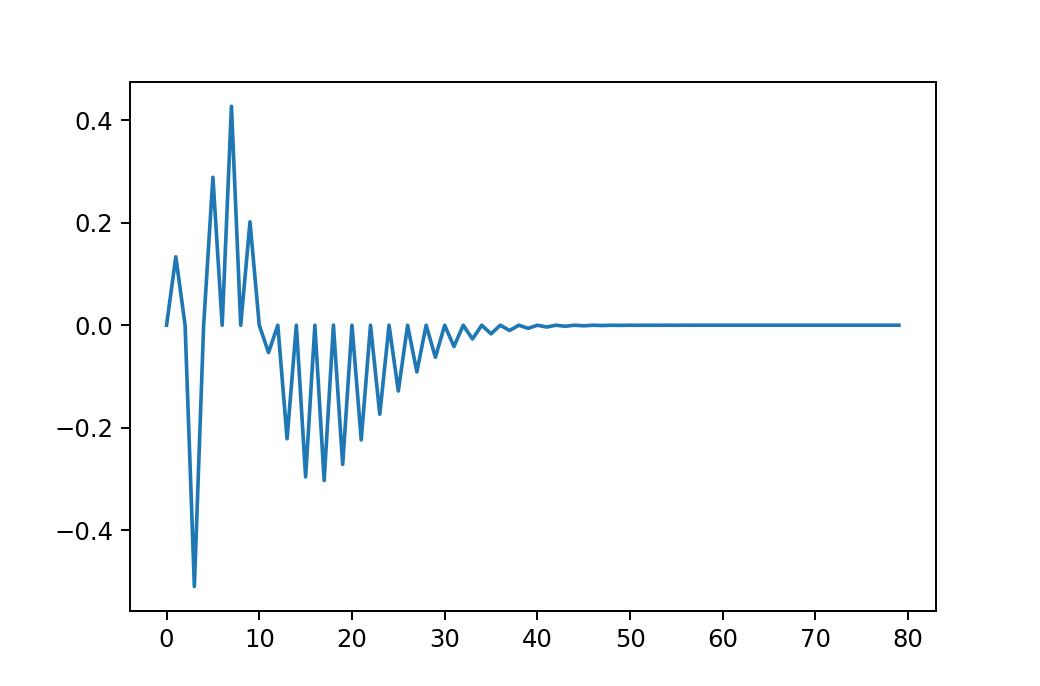

In [31]:
plt.plot(u_b40[:,7])

<IPython.core.display.Javascript object>


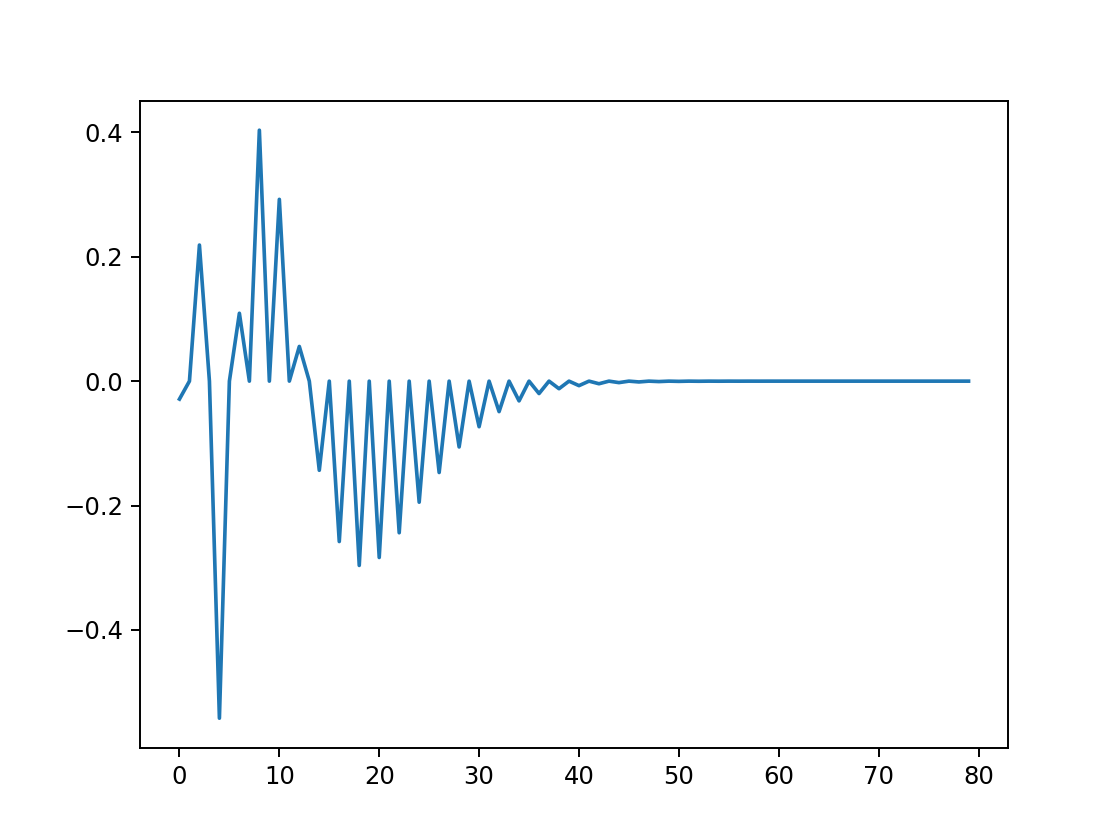

In [32]:
plt.plot(u_b40[:,8])

<IPython.core.display.Javascript object>


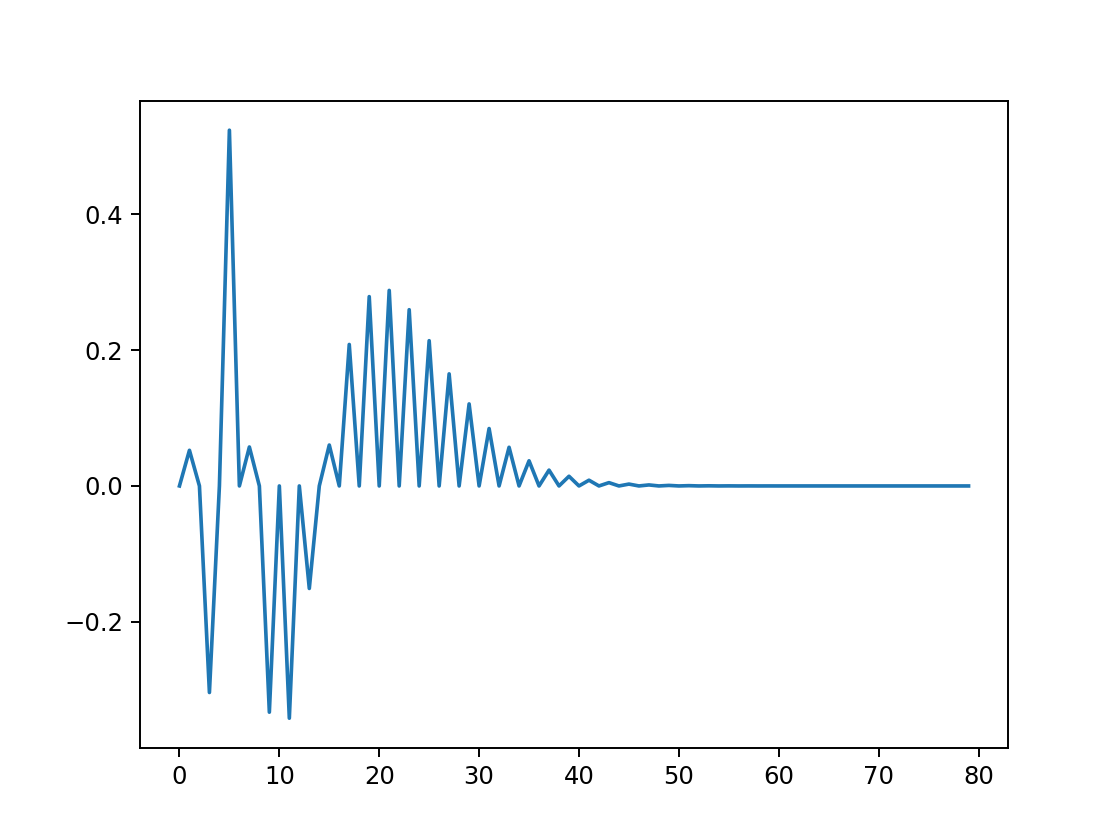

In [33]:
plt.plot(u_b40[:,9])

In [17]:
o2l_mat.dtype

dtype('float64')

In [90]:
np.save("o2l_b40.npy", o2l_mat)

In [81]:
o2l_mat_b160 = o2l(omega, 160, 320001, 80)

In [29]:
o2l_mat_b50 = o2l(omega, 50, 320001, 80)

In [30]:
np.save("o2l_b50.npy", o2l_mat_b50)

In [28]:
o2l_mat_b4 = o2l(omega, 4, 320001, 80)

In [26]:
o2l_mat_b8 = o2l(omega, 8, 320001, 80)

In [27]:
np.save("o2l_b8.npy", o2l_mat_b8)

In [122]:
o2l_mat_b120 = o2l(omega, 120, 320001, 80)

In [123]:
o2l_mat_b120.dtype

dtype('float128')

In [82]:
o2l_mat_b160.dtype

dtype('float128')

In [83]:
np.save("o2l_b160.npy", o2l_mat_b160)

In [124]:
np.save("o2l_b120.npy", o2l_mat_b120)

In [116]:
o2l_mat_b400 = o2l(omega, 400, 320001, 80)

In [111]:
o2l_mat_b200 = o2l(omega, 200, 320001, 80)

In [105]:
o2l_mat_b100 = o2l(omega, 100, 320001, 80)

In [119]:
o2l_mat_b400.dtype

dtype('float128')

In [106]:
np.save("o2l_b100.npy", o2l_mat_b100)

In [107]:
o2l_mat_b100.dtype

dtype('float128')

In [112]:
np.save("o2l_b200.npy", o2l_mat_b200)

In [113]:
o2l_mat_b200.dtype

dtype('float128')

In [118]:
np.save("o2l_b400.npy", o2l_mat_b400)

In [96]:
o2l_mat_b2 = o2l(omega, 2, 160001, 80)

In [98]:
np.save("o2l_b2.npy", o2l_mat_b2)

In [31]:
o2l_mat_b4 = o2l(omega, 4, 160001, 80)

In [32]:
np.save("o2l_b4.npy", o2l_mat_b4)

In [33]:
o2l_mat_b16 = o2l(omega, 16, 320001, 80)

In [34]:
np.save("o2l_b16.npy", o2l_mat_b16)

In [8]:
from scipy.linalg import svd

In [84]:
u_b160, s_b160, vh_b160 = svd(o2l_mat_b160, lapack_driver='gesvd')

In [108]:
u_b100, s_b100, vh_b100 = svd(o2l_mat_b100, lapack_driver='gesvd')

In [125]:
u_b120, s_b120, vh_b120 = svd(o2l_mat_b120, lapack_driver='gesvd')

In [120]:
u_b400, s_b400, vh_b400 = svd(o2l_mat_b400, lapack_driver='gesvd')

In [114]:
u_b200, s_b200, vh_b200 = svd(o2l_mat_b200, lapack_driver='gesvd')

In [19]:
omega = np.linspace(-8,8,800)
o2l_mat = o2l(omega, 40, 320001, 80)

In [21]:
np.save("o2l.npy", o2l_mat)

In [22]:
o2l_mat = np.load("o2l.npy")
u, s, vh = svd(o2l_mat, lapack_driver='gesvd')

In [99]:
u_b2, s_b2, vh_b2 = svd(o2l_mat_b2, lapack_driver='gesvd')

In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


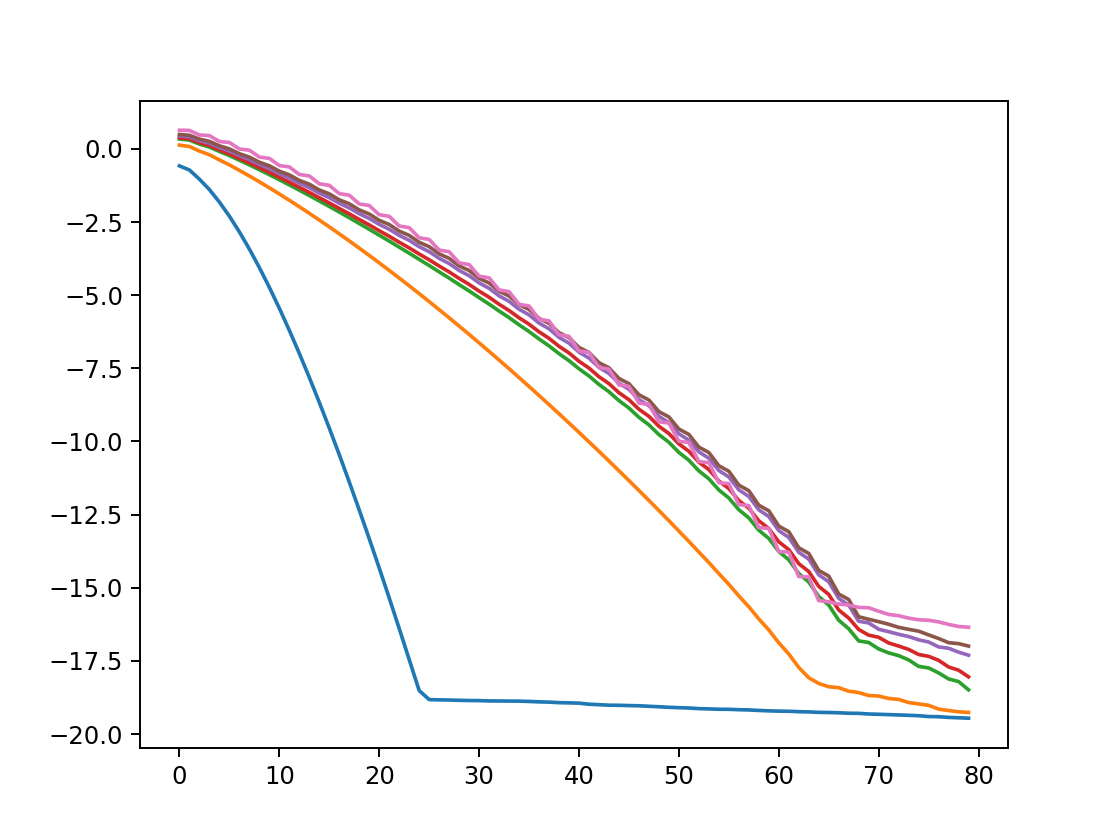

In [126]:
plt.plot(np.log10(s_b2))
plt.plot(np.log10(s))
plt.plot(np.log10(s_b100))
plt.plot(np.log10(s_b120))
plt.plot(np.log10(s_b160))
plt.plot(np.log10(s_b200))
plt.plot(np.log10(s_b400))

In [127]:
omega = np.linspace(-160 ,160 , 800)

In [129]:
o2l_mat_b2_scaled = o2l(omega, 2, 320001, 80)

In [130]:
np.save("o2l_b2_scaled.npy", o2l_mat_b2_scaled)

In [131]:
u_b2_s, s_b2_s, vh_b2_s = svd(o2l_mat_b2_scaled, lapack_driver='gesvd')

<IPython.core.display.Javascript object>


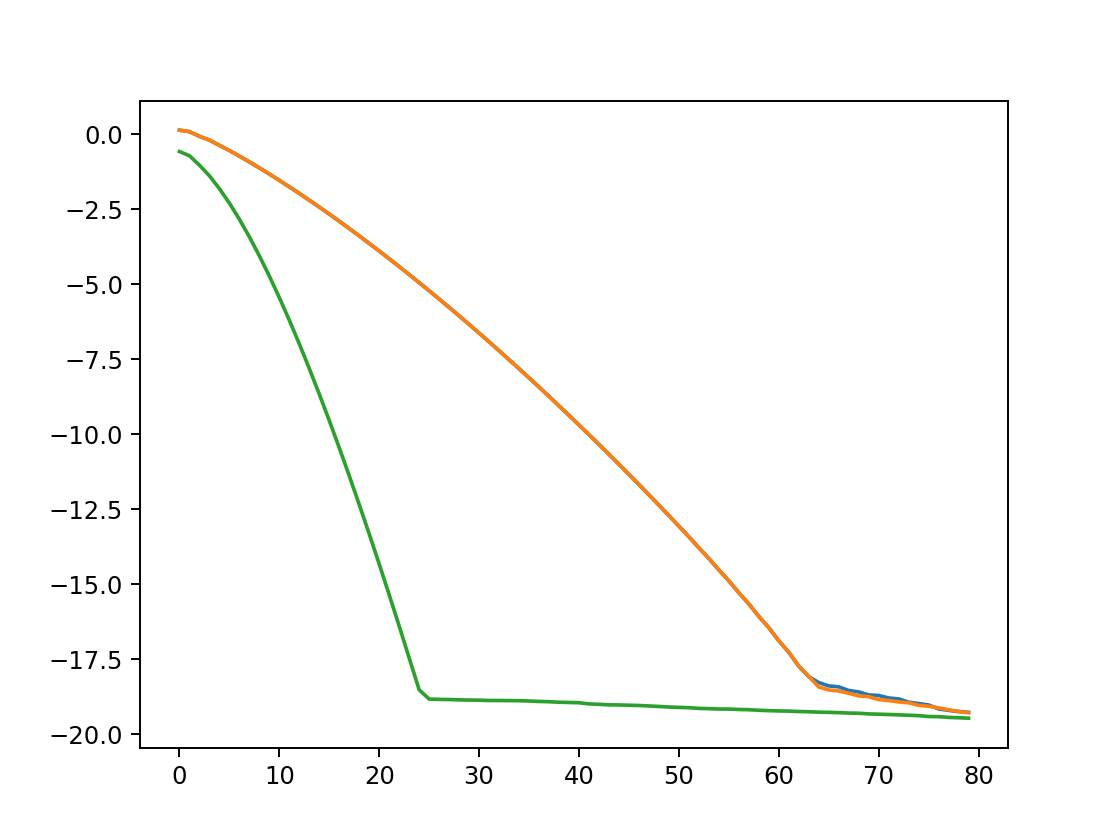

In [132]:
plt.plot(np.log10(s))
plt.plot(np.log10(s_b2_s))
plt.plot(np.log10(s_b2))

In [133]:
omega = np.linspace(-80, 80, 400)

In [134]:
o2l_mat_b2_scaled_t1 = o2l(omega, 2, 320001, 80)

In [135]:
np.save("o2l_b2_scaled_e80.npy", o2l_mat_b2_scaled_t1)

In [136]:
u_b2_s_t1, s_b2_s_t1, vh_b2_s_t1 = svd(o2l_mat_b2_scaled_t1, lapack_driver='gesvd')

In [138]:
omega = np.linspace(-80, 80, 800)

In [139]:
o2l_mat_b2_scaled_t2 = o2l(omega, 2, 320001, 80)

In [140]:
np.save("o2l_b2_scaled_e80_d800.npy", o2l_mat_b2_scaled_t2)

In [141]:
u_b2_s_t2, s_b2_s_t2, vh_b2_s_t2 = svd(o2l_mat_b2_scaled_t2, lapack_driver='gesvd')

<IPython.core.display.Javascript object>


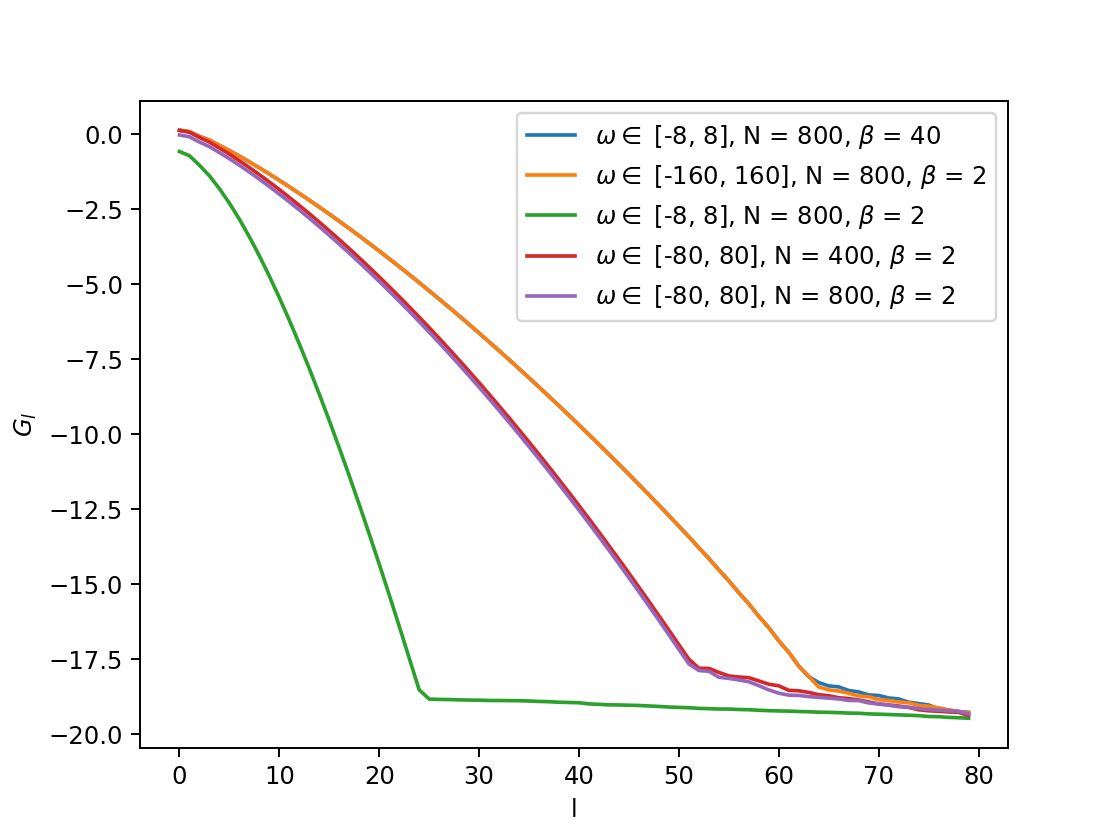

In [146]:
plt.plot(np.log10(s), label = r'$\omega \in$ [-8, 8], N = 800, $\beta$ = 40')
plt.plot(np.log10(s_b2_s), label = r'$\omega \in$ [-160, 160], N = 800, $\beta$ = 2')
plt.plot(np.log10(s_b2), label = r'$\omega \in$ [-8, 8], N = 800, $\beta$ = 2')
plt.plot(np.log10(s_b2_s_t1), label = r'$\omega \in$ [-80, 80], N = 400, $\beta$ = 2')
plt.plot(np.log10(s_b2_s_t2), label = r'$\omega \in$ [-80, 80], N = 800, $\beta$ = 2')
plt.xlabel(r"l")
plt.ylabel(r"$G_l$")
plt.legend()

grid point density does not affect the ill-conditioned-ness, but energy range does

In [148]:
omega = np.linspace(-16, 16, 800)

In [149]:
o2l_mat_e16 = o2l(omega, 40, 320001, 80)

In [150]:
np.save("o2l_e16.npy", o2l_mat_e16)

In [12]:
o2l_mat_e16 = np.load("o2l_e16.npy")
u_e16, s_e16, vh_e16 = svd(o2l_mat_e16, lapack_driver='gesvd')

In [153]:
omega = np.linspace(-32, 32, 800)

In [154]:
o2l_mat_e32 = o2l(omega, 40, 320001, 80)

In [155]:
np.save("o2l_e32.npy", o2l_mat_e32)

In [11]:
o2l_mat_e32 = np.load("o2l_e32.npy")
u_e32, s_e32, vh_e32 = svd(o2l_mat_e32, lapack_driver='gesvd')

In [4]:
omega = np.linspace(-64, 64, 1600)
o2l_mat_e64 = o2l(omega, 40, 160001, 80)

In [6]:
np.save("o2l_e64.npy", o2l_mat_e64)

In [10]:
u_e64, s_e64, vh_e64 = svd(o2l_mat_e64, lapack_driver='gesvd')

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


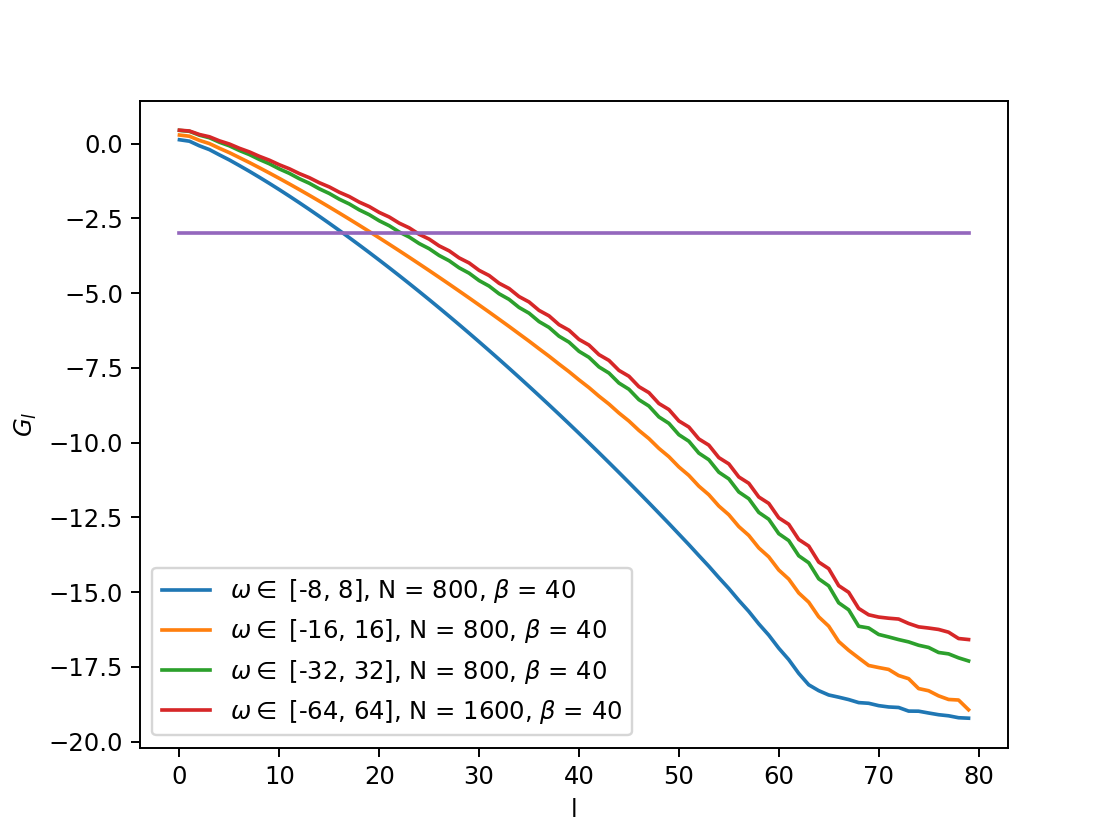

In [23]:
plt.plot(np.log10(s), label = r'$\omega \in$ [-8, 8], N = 800, $\beta$ = 40')
plt.plot(np.log10(s_e16), label = r'$\omega \in$ [-16, 16], N = 800, $\beta$ = 40')
plt.plot(np.log10(s_e32), label = r'$\omega \in$ [-32, 32], N = 800, $\beta$ = 40')
plt.plot(np.log10(s_e64[:80]), label = r'$\omega \in$ [-64, 64], N = 1600, $\beta$ = 40')
plt.plot(np.zeros(80) -3)

plt.xlabel(r"l")
plt.ylabel(r"$G_l$")
plt.legend()

In [88]:
Gl_test = Aw2Gl_mat(A_omega_val, omega, 40, 160001, 80)

In [92]:
Gl = Aw2Gl(A_omega_val, omega, 40, 160001, 80)

Start to compute G_tau
start to compute G_l, lmax = 80


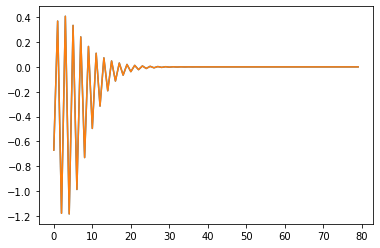

In [93]:
plt.plot(Gl[2,:])
plt.plot(Gl_test[2,:])